# Final Project Submission

Please fill out:
* Student name: Stephan Osterburg
* Student pace: full time
* Scheduled project review date/time: 01/14/2019
* Instructor name: Rafael Carrasco
* Blog post URL: https://stephanosterburg.github.io/forest/


---

# [Forest Cover Type Dataset](https://archive.ics.uci.edu/ml/datasets/Covertype)
**Tree types found in the Roosevelt National Forest in Colorado**

## Context
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

## Data Set Information:

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. 

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value. 

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4). 

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

## Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

In regards to the number of attributes, we have 12 measurements spread out over 54 columns of data. Ten are quantitative variables, four binary are wilderness areas, and 40 binary are soil type variables.

You can find more information about the data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info).


## Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found [here](https://archive.ics.uci.edu/ml/datasets/Covertype). The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

---

# Import Necessary Libraries

In [43]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

---

# Read Data

In [2]:
df = pd.read_csv('data/covtype.csv')
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points     ...      Soil_Type32  Soil_Type33  \
0                                6279     ...                0            0   
1                                6225     ...                0            0   
2                                6121     ...                0            0   
3                                6211     ...                0            0   
4                                6172     ...                0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [3]:
print('Features: {} \nObservations: {}'.format(df.shape[1], df.shape[0]))

Features: 55 
Observations: 581012


In [4]:
print(df.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

All columns are proberbly named

## Finding

* The dataset has 54 features and 1 target variable `Cover_Type`.
* From the 54 features, 10 are numerical and 44 are categorical.
* From the categorical data 4 are of `Wilderness_Area` and 40 are of `Soil_Type`

### Categorical Data
With the informations from [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info) we know the correct names of all `Soil_Types` and `Wilderness_Areas`. See table below.

We will keep the current feature naming, but might take a closer look later if necessary.

Feature Name    |    Names
---------------|:--------
Wilderness_Area1    |    Rawah Wilderness Area
Wilderness_Area2    |    Neota Wilderness Area
Wilderness_Area3    |    Comanche Wilderness Area
Wilderness_Area4    |    Cache La Poudre Wilderness Area
Soil_Type1    |    Cathedral family - Rock outcrop complex, extremely stony
Soil_Type2    |    Vanet - Ratake families complex, very stony
Soil_Type3    |    Haploborolis - Rock outcrop complex, rubbly
Soil_Type4    |    Ratake family - Rock outcrop complex, rubbly
Soil_Type5    |    Vanet family - Rock outcrop complex, rubbly
Soil_Type6    |    Vanet - Wetmore families - Rock outcrop complex, stony
Soil_Type7    |    Gothic family
Soil_Type8    |    Supervisor - Limber families complex
Soil_Type9    |    Troutville family, very stony
Soil_Type10    |    Bullwark - Catamount families - Rock outcrop complex, rubbly
Soil_Type11    |    Bullwark - Catamount families - Rock land complex, rubbly
Soil_Type12    |    Legault family - Rock land complex, stony
Soil_Type13    |    Catamount family - Rock land - Bullwark family complex, rubbly
Soil_Type14    |    Pachic Argiborolis - Aquolis complex
Soil_Type15    |    unspecified in the USFS Soil and ELU Survey
Soil_Type16    |    Cryaquolis - Cryoborolis complex
Soil_Type17    |    Gateview family - Cryaquolis complex
Soil_Type18    |    Rogert family, very stony
Soil_Type19    |    Typic Cryaquolis - Borohemists complex
Soil_Type20    |    Typic Cryaquepts - Typic Cryaquolls complex
Soil_Type21    |    Typic Cryaquolls - Leighcan family, till substratum complex
Soil_Type22    |    Leighcan family, till substratum, extremely bouldery
Soil_Type23    |    Leighcan family, till substratum, - Typic Cryaquolls complex.
Soil_Type24    |    Leighcan family, extremely stony
Soil_Type25    |    Leighcan family, warm, extremely stony
Soil_Type26    |    Granile - Catamount families complex, very stony
Soil_Type27    |    Leighcan family, warm - Rock outcrop complex, extremely stony
Soil_Type28    |    Leighcan family - Rock outcrop complex, extremely stony
Soil_Type29    |    Como - Legault families complex, extremely stony
Soil_Type30    |    Como family - Rock land - Legault family complex, extremely stony
Soil_Type31    |    Leighcan - Catamount families complex, extremely stony
Soil_Type32    |    Catamount family - Rock outcrop - Leighcan family complex, extremely stony
Soil_Type33    |    Leighcan - Catamount families - Rock outcrop complex, extremely stony
Soil_Type34    |    Cryorthents - Rock land complex, extremely stony
Soil_Type35    |    Cryumbrepts - Rock outcrop - Cryaquepts complex
Soil_Type36    |    Bross family - Rock land - Cryumbrepts complex, extremely stony
Soil_Type37    |    Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony
Soil_Type38    |    Leighcan - Moran families - Cryaquolls complex, extremely stony
Soil_Type39    |    Moran family - Cryorthents - Leighcan family complex, extremely stony
Soil_Type40    |    Moran family - Cryorthents - Rock land complex, extremely stony

**Note:** from that list above there always only one combination available, well possible I should say. For example, `Soil_Type23` has a `1` and `Wilderness_Area1` has a `1`, all other for that observation will have a `0`.

### Numerica Data

As shown below in the table we have different data representation, some are in meters, degrees or a value between 0 and 255 as index.

Name                                  |   Data Type   | Measurement      | Description
--------------------------------------|---------------|------------------|------------
Elevation                             |  quantitative |   meters         |   Elevation in meters
Aspect                                |  quantitative |   azimuth        |   Aspect in degrees azimuth
Slope                                 |  quantitative |   degrees        |   Slope in degrees
Horizontal_Distance_To_Hydrology      |  quantitative |   meters         |   Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology        |  quantitative |   meters         |   Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways       |  quantitative |   meters         |   Horz Dist to nearest roadway
Horizontal_Distance_To_Fire_Points    |  quantitative |   meters         |   Horz Dist to nearest wildfire ignition points
Hillshade_9am                         |  quantitative |   0 to 255 index |   Hillshade index at 9am, summer solstice
Hillshade_Noon                        |  quantitative |   0 to 255 index |   Hillshade index at noon, summer soltice
Hillshade_3pm                         |  quantitative |   0 to 255 index |   Hillshade index at 3pm, summer solstice

We might ask ourself, do we need to do any data conversion here or not. For right now we will leave the data as is. And may come back to it when needed.

### Target Variable

The target variable `Cover_Type` is of type integer and ranges from `1` and `7` and representes a type of tree, eg. Douglas-Fir.


Key | Class
----|--------------
1   | Spruce/Fir
2   | Lodgepole Pine
3   | Ponderosa Pine
4   | Cottonwood/Willow
5   | Aspen
6   | Douglas-fir
7   | Krummholz


---

# Data Exploration

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [6]:
df.isnull().values.any()

False

**Note:** Great! We don't have any null values and of any odd data type.

In [7]:
# Handling Duplicates
df.drop_duplicates(keep='first')
df.shape

(581012, 55)

**Note:** No Duplicate data found.

## Feature Statistics

We will split the dataset into `numerical` and into `categorical` data. And put the target variable `Cover_Type` into its own df.

In [8]:
# Create different datasets by type and area
cont_df = df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
cat_df  = df.loc[:,'Wilderness_Area1':'Soil_Type40']
wild_df = df.loc[:,'Wilderness_Area1': 'Wilderness_Area4']
soil_df = df.loc[:,'Soil_Type1':'Soil_Type40']
target  = df['Cover_Type']

## Continues Data

We will look at the statistics of numerical features and extract useful informations.

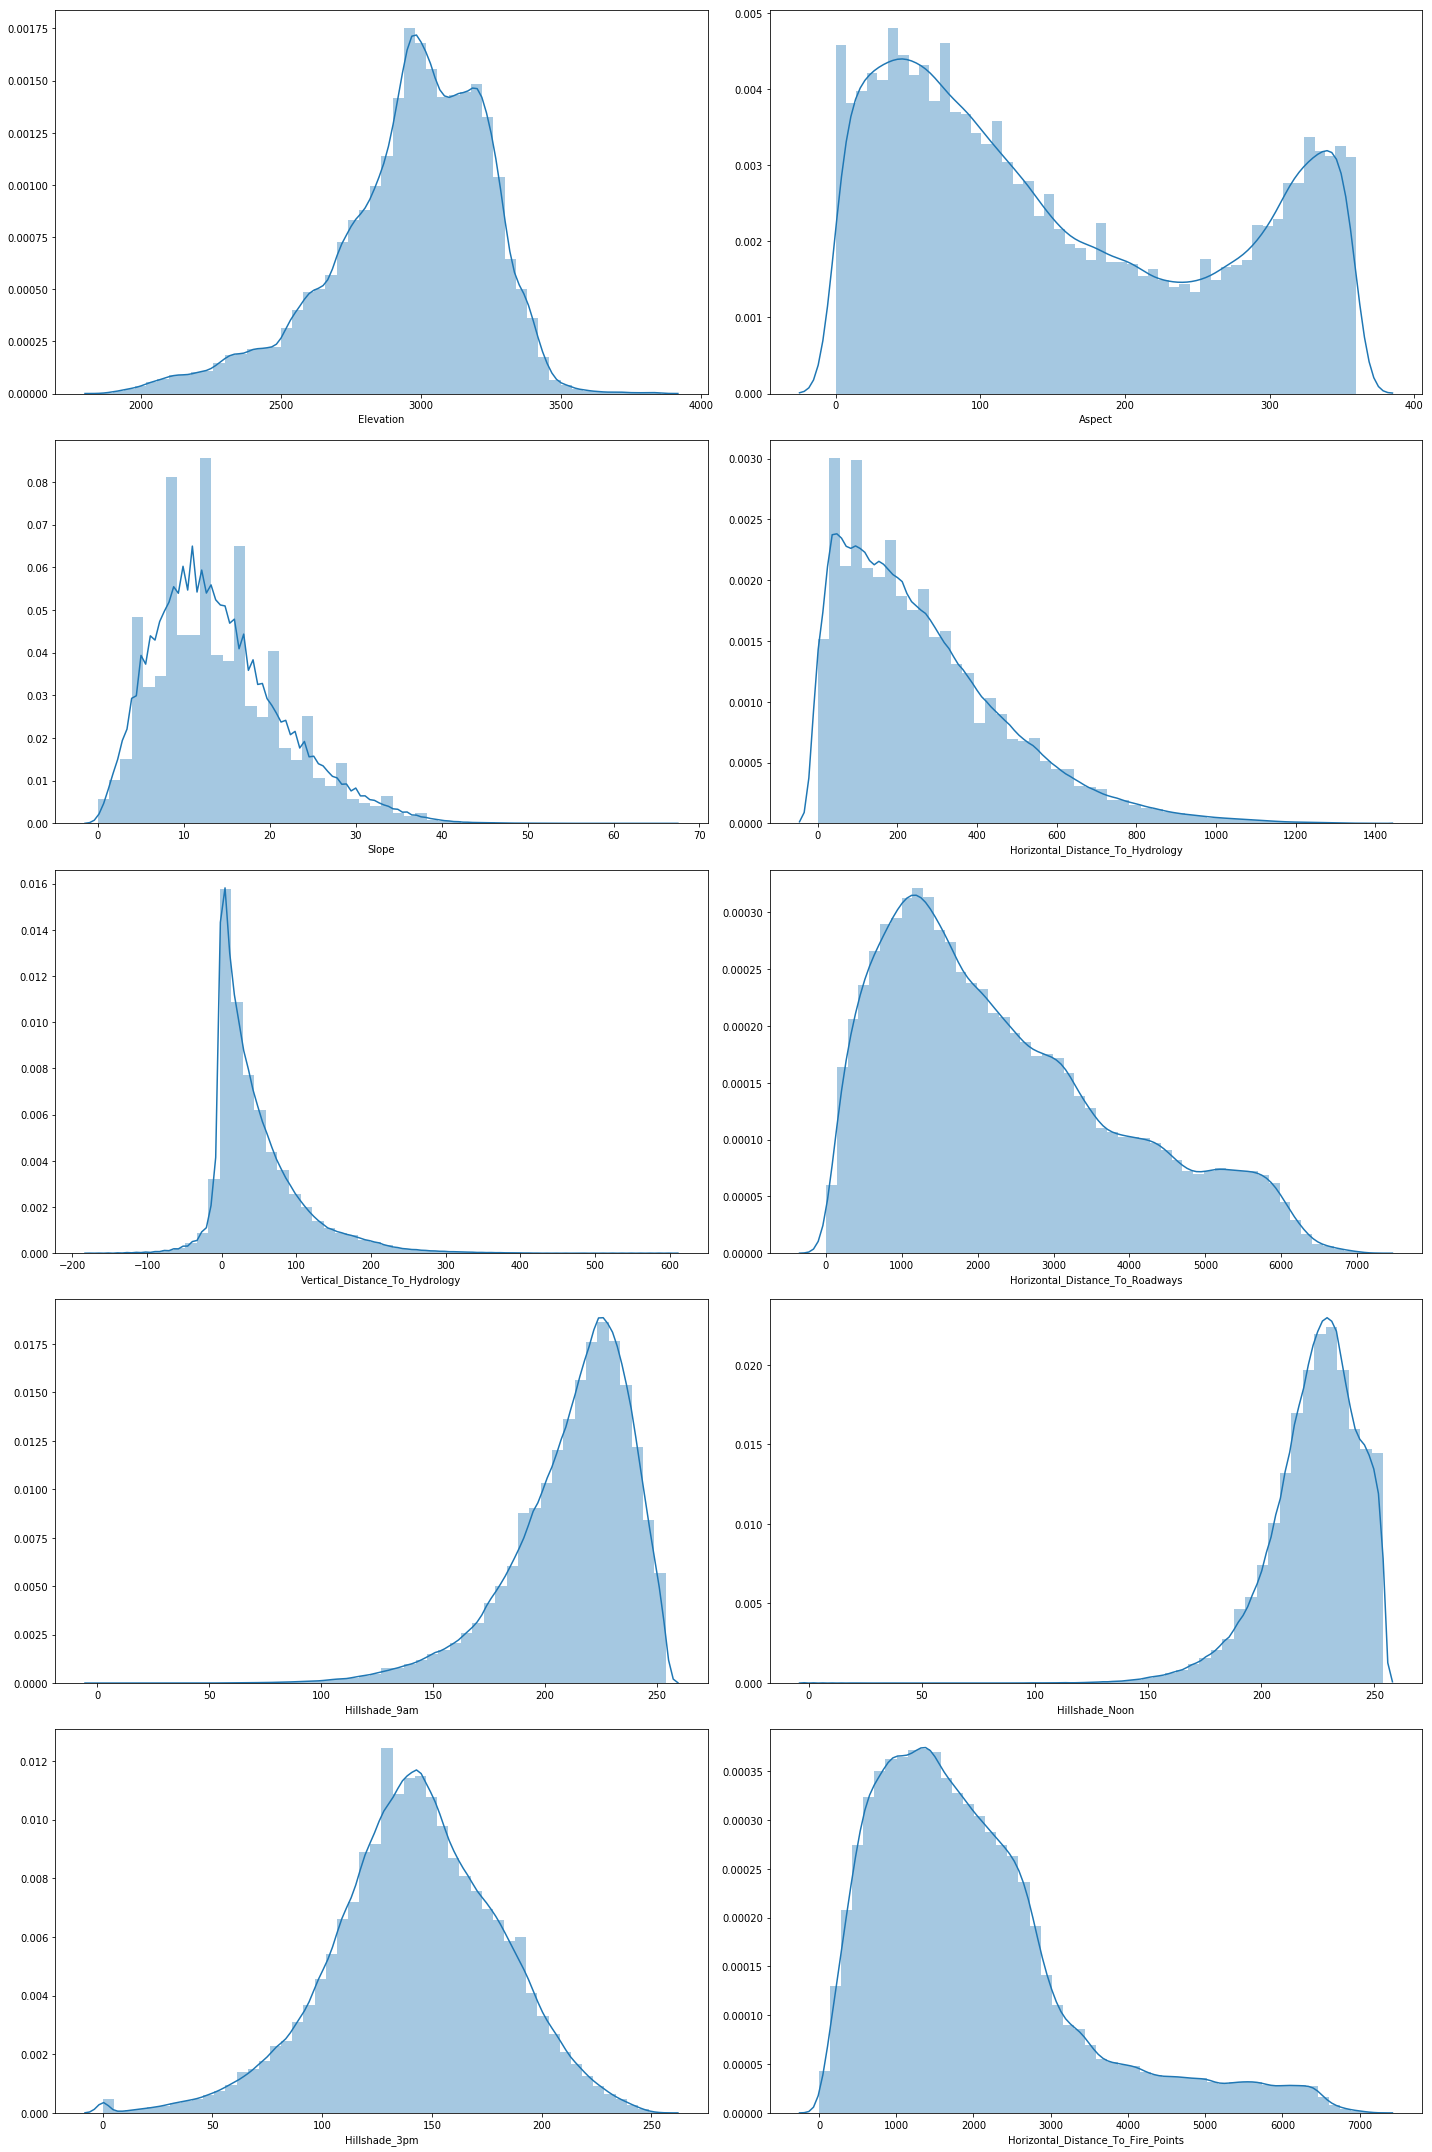

In [9]:
# pick number of columns
ncol = 2
# make sure enough subplots
nrow = math.floor((len(cont_df.columns) + ncol - 1) / ncol)
# create the axes
height = 6 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(cont_df.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.distplot(cont_df[col], ax=ax[ix])

plt.tight_layout()
plt.show();

In [10]:
cont_df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581012.000000                       581012.000000  
mean      142.528263                         1980.291226  
std        38.274529                         1324.195210  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

### Findings:

* The `mean` of the features vary from as low as `14` to as high as `2959`. This is due to the different type of measurements, i.e. degrees vs meters.
* The `standard deviation` (std) tells us how the spread of the data is from the mean. For example, `Horizontal_Distance_To_Hydrology` has a wide spread, but `Hillshade_Noon` has a narrow spread.
* With the exception of `Elevation` and `Vertical_Distance_To_Hydrology` all other features have a minimum value of `0`.
* With maybe one exception our data is skewed. 
* Slope looks off, but for time being we shall ignore it.

## Feature Skewness (Continues Data)

In [11]:
print(cont_df.skew())

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      1.140437
Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
dtype: float64


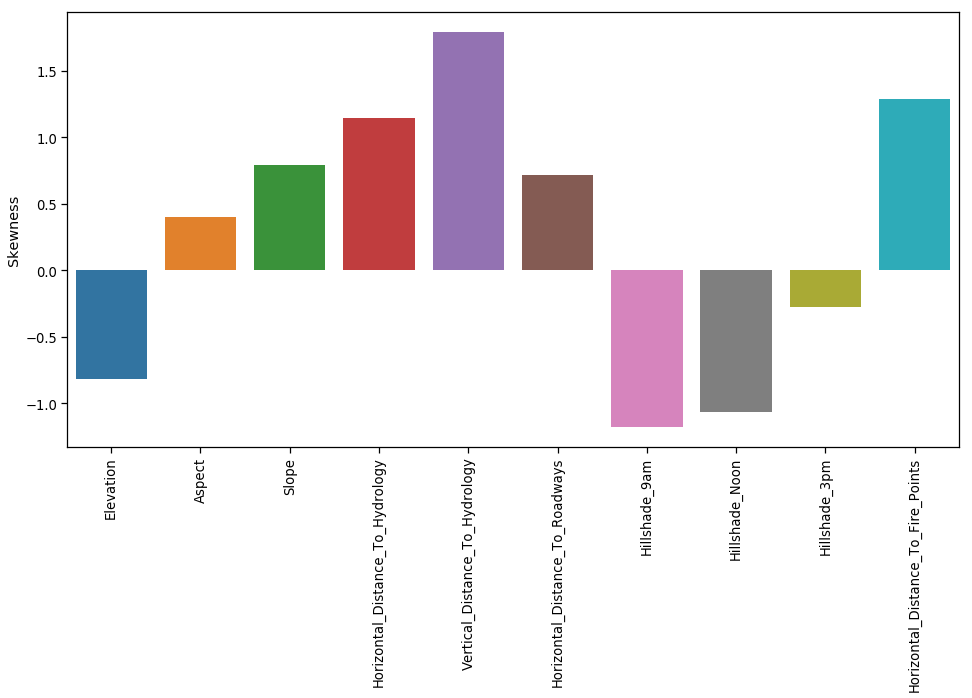

In [12]:
skew_df = pd.DataFrame(cont_df.skew(), columns=['Skewness'])

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(16, 8))
sns.barplot(data=skew_df, x=skew_df.index, y='Skewness')
plt.xticks(rotation=90)
plt.show();

### Findings

* The skewness values vary between fairly symmetrical (`Hillshade_3pm`) to highly skewed (`Vertical_Distance_To_Hydrlogy`). But in general I would say they are mostly moderately skewed.

## Categorical Data

### Wilderness Area

In [13]:
for c in wild_df.columns:
    print('{}: {}'.format(c, wild_df[c].value_counts()[1]))

Wilderness_Area1: 260796
Wilderness_Area2: 29884
Wilderness_Area3: 253364
Wilderness_Area4: 36968


In [14]:
tmpList = []
for c in wild_df.columns:
    tmpList += [str(c)] * wild_df[c].value_counts()[1]

se = pd.Series(tmpList)
df['Wilderness_Types'] = se.values

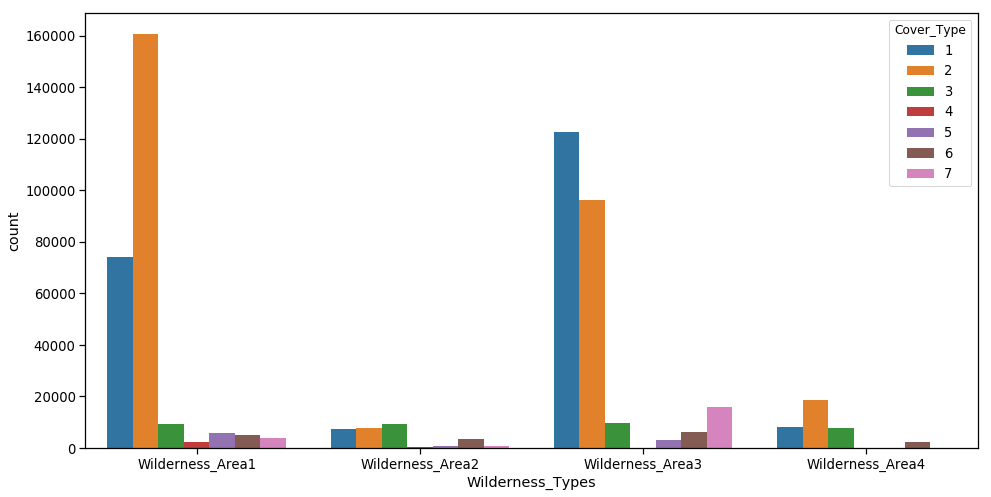

In [15]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Wilderness_Types', hue='Cover_Type')
plt.show();

### Soil Type

In [16]:
for c in soil_df.columns:
    print('{}: {}'.format(c, soil_df[c].value_counts()[1]))

Soil_Type1: 3031
Soil_Type2: 7525
Soil_Type3: 4823
Soil_Type4: 12396
Soil_Type5: 1597
Soil_Type6: 6575
Soil_Type7: 105
Soil_Type8: 179
Soil_Type9: 1147
Soil_Type10: 32634
Soil_Type11: 12410
Soil_Type12: 29971
Soil_Type13: 17431
Soil_Type14: 599
Soil_Type15: 3
Soil_Type16: 2845
Soil_Type17: 3422
Soil_Type18: 1899
Soil_Type19: 4021
Soil_Type20: 9259
Soil_Type21: 838
Soil_Type22: 33373
Soil_Type23: 57752
Soil_Type24: 21278
Soil_Type25: 474
Soil_Type26: 2589
Soil_Type27: 1086
Soil_Type28: 946
Soil_Type29: 115247
Soil_Type30: 30170
Soil_Type31: 25666
Soil_Type32: 52519
Soil_Type33: 45154
Soil_Type34: 1611
Soil_Type35: 1891
Soil_Type36: 119
Soil_Type37: 298
Soil_Type38: 15573
Soil_Type39: 13806
Soil_Type40: 8750


In [17]:
tmpList = []
for c in soil_df.columns:
    tmpList += [str(c)] * soil_df[c].value_counts()[1]

se = pd.Series(tmpList)
df['Soil_Types'] = se.values

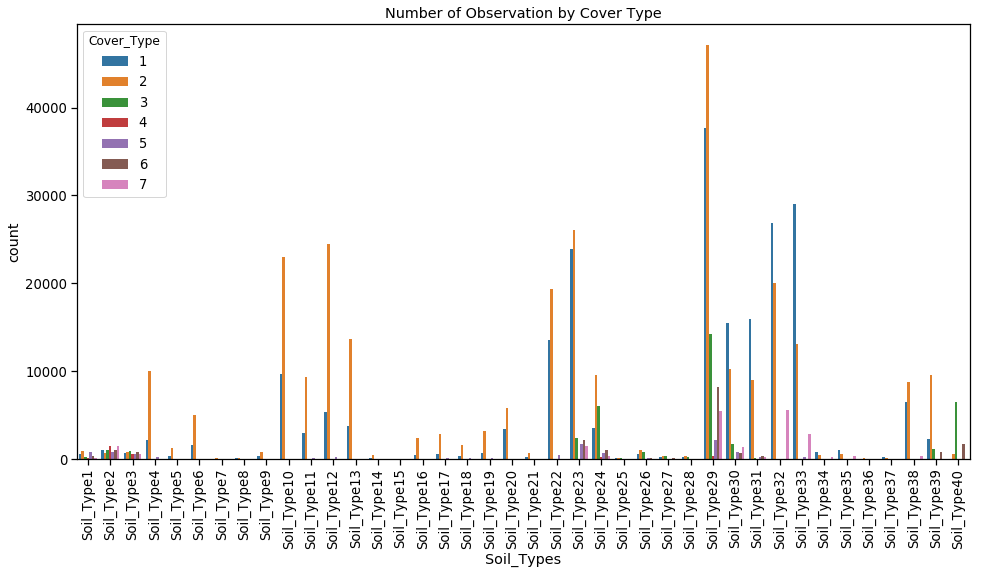

In [18]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Soil_Types', hue='Cover_Type')
plt.title('Number of Observation by Cover Type')
plt.xticks(rotation=90)
plt.show();

In [19]:
soil_df['Soil_Type29'].describe()

count    581012.000000
mean          0.198356
std           0.398762
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Soil_Type29, dtype: float64

In [20]:
soil_df['Soil_Type29'].value_counts()

0    465765
1    115247
Name: Soil_Type29, dtype: int64

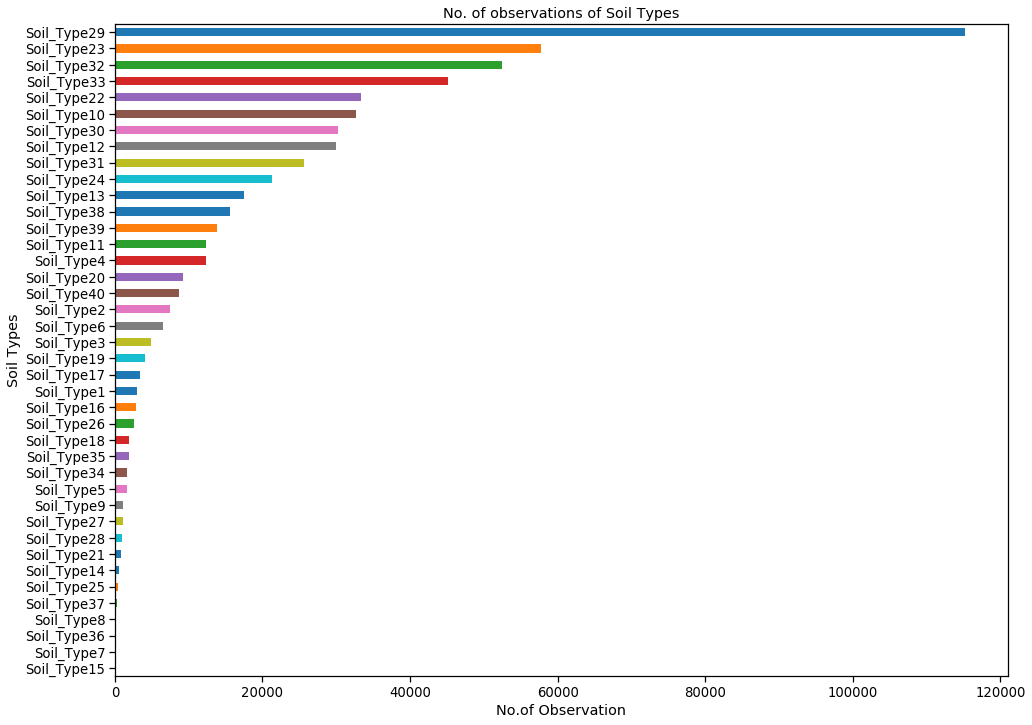

In [21]:
# sum Soil data values, and pass it as a series 
soil_sum = pd.Series(soil_df.sum())

# will sort values in descending order
soil_sum.sort_values(ascending = False, inplace = True)

# plot horizontal bar with given size using color defined
soil_sum.plot(kind='barh', figsize=(16, 12))

# horizontal bar flips columns in ascending order, this will filp it back in descending order
plt.gca().invert_yaxis()

plt.title('No. of observations of Soil Types')
plt.xlabel('No.of Observation')
plt.ylabel('Soil Types')

plt.xticks(rotation = 'horizontal')
plt.show();

In [22]:
soil_sum

Soil_Type29    115247
Soil_Type23     57752
Soil_Type32     52519
Soil_Type33     45154
Soil_Type22     33373
Soil_Type10     32634
Soil_Type30     30170
Soil_Type12     29971
Soil_Type31     25666
Soil_Type24     21278
Soil_Type13     17431
Soil_Type38     15573
Soil_Type39     13806
Soil_Type11     12410
Soil_Type4      12396
Soil_Type20      9259
Soil_Type40      8750
Soil_Type2       7525
Soil_Type6       6575
Soil_Type3       4823
Soil_Type19      4021
Soil_Type17      3422
Soil_Type1       3031
Soil_Type16      2845
Soil_Type26      2589
Soil_Type18      1899
Soil_Type35      1891
Soil_Type34      1611
Soil_Type5       1597
Soil_Type9       1147
Soil_Type27      1086
Soil_Type28       946
Soil_Type21       838
Soil_Type14       599
Soil_Type25       474
Soil_Type37       298
Soil_Type8        179
Soil_Type36       119
Soil_Type7        105
Soil_Type15         3
dtype: int64

### Findings

* The most positive observations are seen in `Soil_Type29` with 115,247 counts followed by `Soil_Type23`, `Soil_Type32` and `Soil_Type33`.
* From a statistical standpoint, `Soil_Type29` is approximately `20%` represented in all of the data in regards to soil types.
* The least found soil type in the data is `Soil_Type15`, `Soil_Type7` and `Soil_Type36`.
* But based on the numbers from above we might consider dropping a handful soil types, eg. 7 and 8. We could do some fancy math but I will just pick the once which stand out to me.

## Feature Skewness (Categorical Data)

In [23]:
print(cat_df.skew())

Wilderness_Area1      0.205618
Wilderness_Area2      4.061595
Wilderness_Area3      0.257822
Wilderness_Area4      3.575561
Soil_Type1           13.736670
Soil_Type2            8.615358
Soil_Type3           10.838630
Soil_Type4            6.625176
Soil_Type5           18.995243
Soil_Type6            9.240061
Soil_Type7           74.367173
Soil_Type8           56.946415
Soil_Type9           22.440005
Soil_Type10           3.855317
Soil_Type11           6.621186
Soil_Type12           4.054662
Soil_Type13           5.510281
Soil_Type14          31.096237
Soil_Type15         440.078023
Soil_Type16          14.185489
Soil_Type17          12.914877
Soil_Type18          17.405794
Soil_Type19          11.895466
Soil_Type20           7.730948
Soil_Type21          26.274260
Soil_Type22           3.804032
Soil_Type23           2.677848
Soil_Type24           4.933954
Soil_Type25          34.968140
Soil_Type26          14.880229
Soil_Type27          23.065265
Soil_Type28          24.722103
Soil_Typ

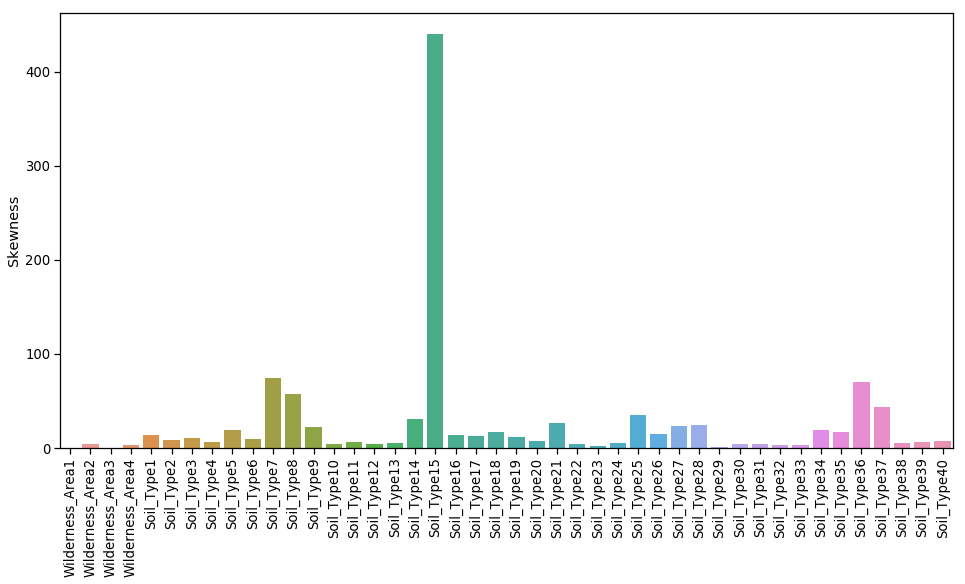

In [24]:
skew_df = pd.DataFrame(cat_df.skew(), columns=['Skewness'])

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(16, 8))
sns.barplot(data=skew_df, x=skew_df.index, y='Skewness')
plt.xticks(rotation=90)
plt.show();

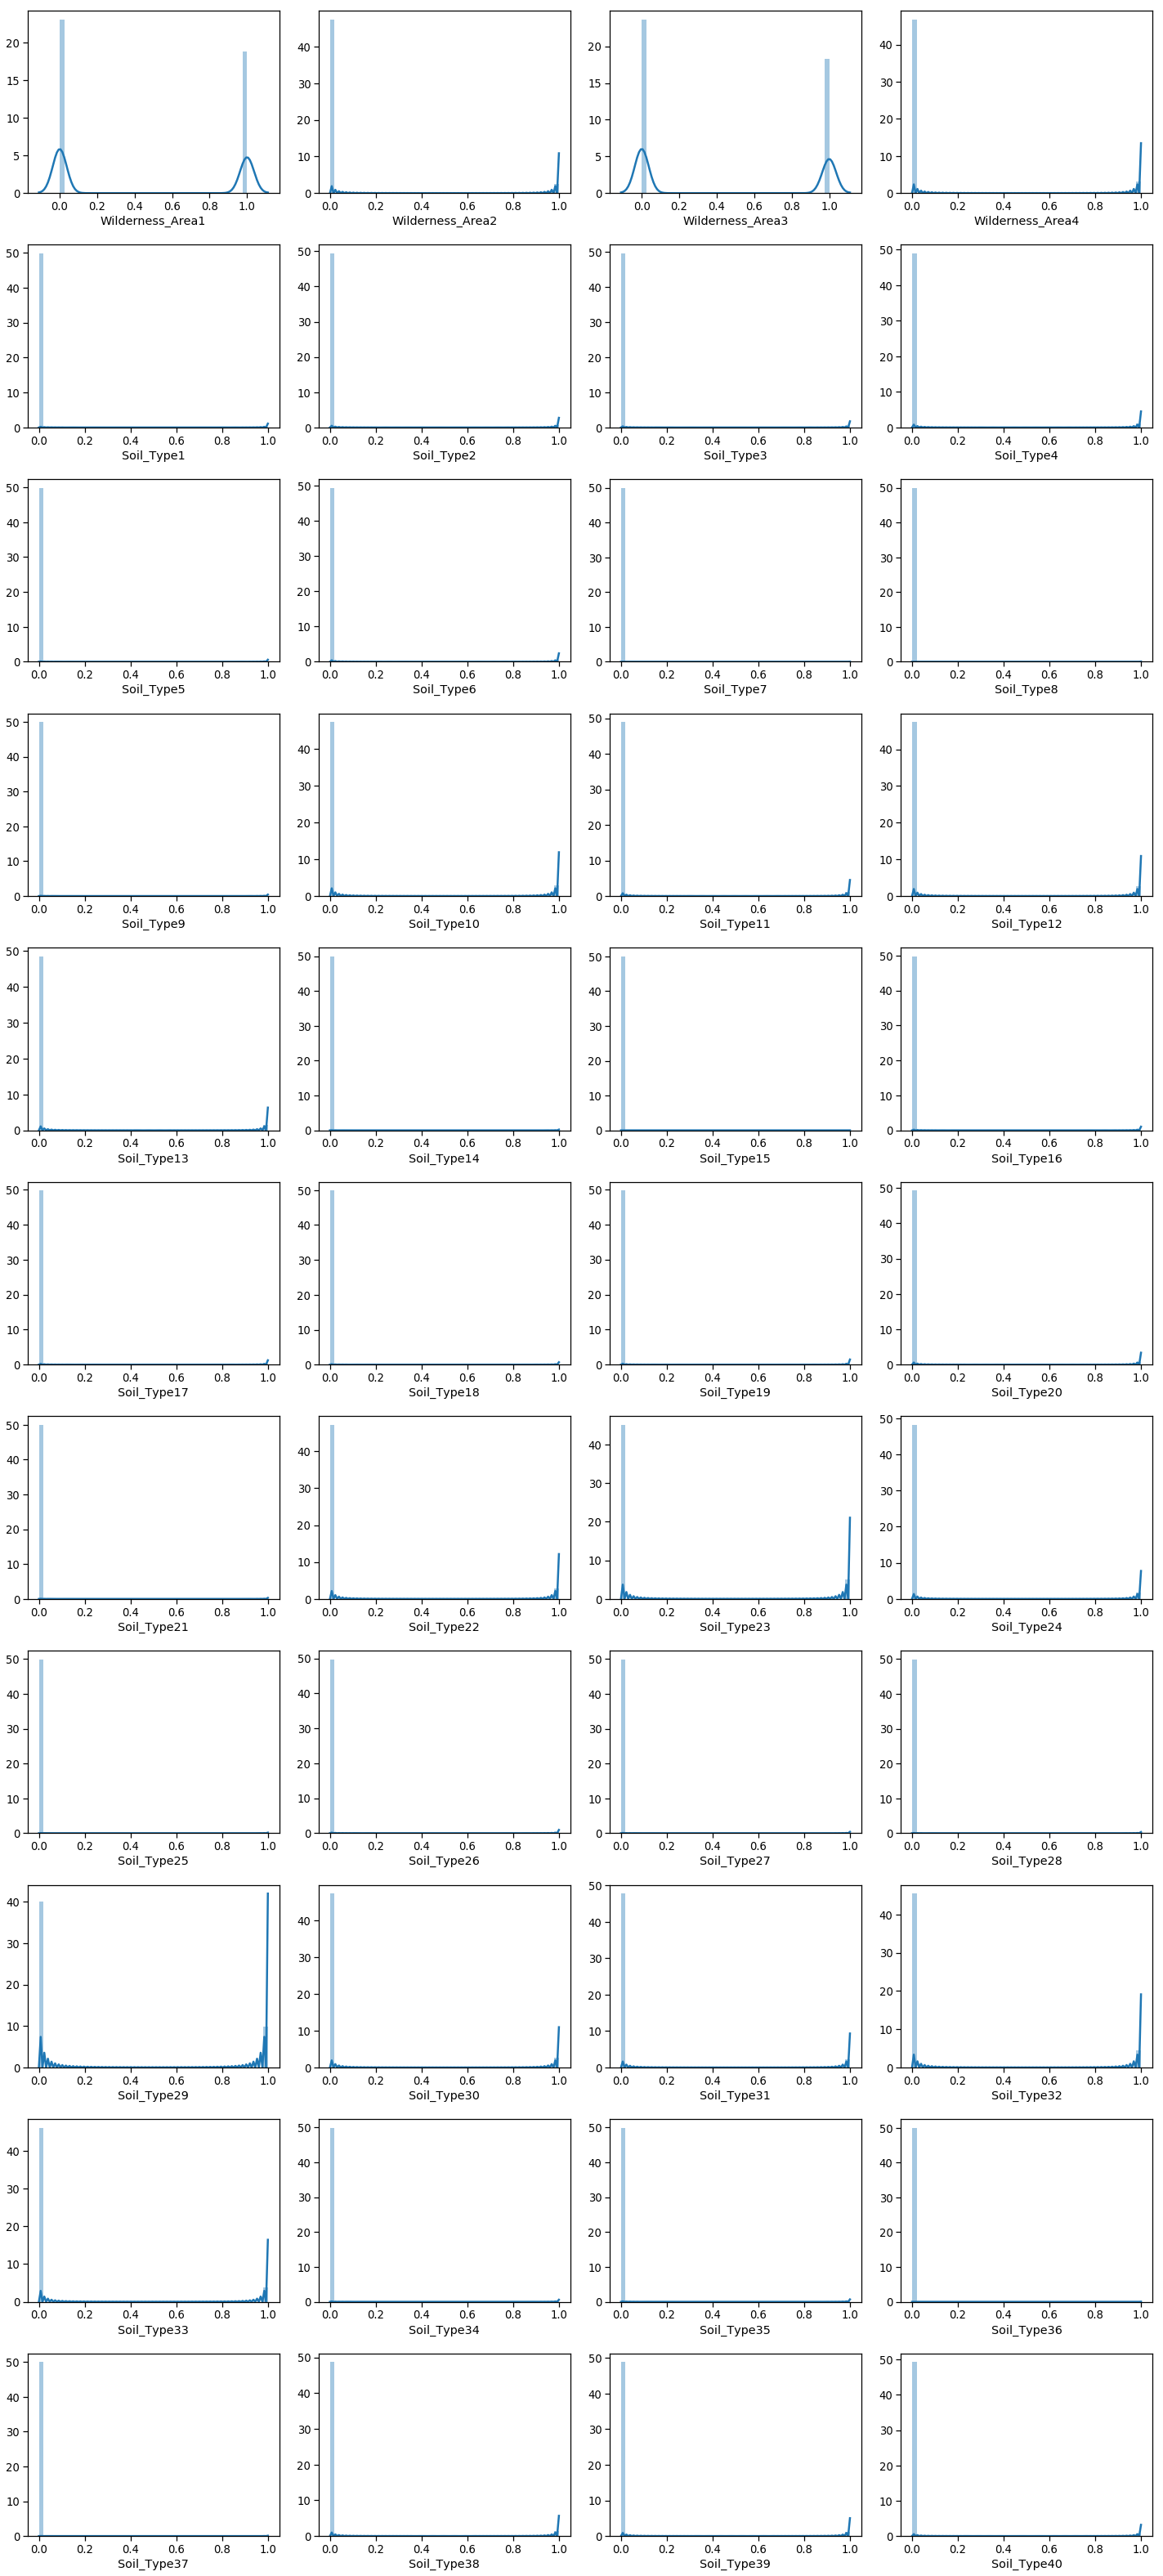

In [25]:
# pick number of columns
ncol = 4
# make sure enough subplots
nrow = math.floor((len(cat_df.columns) + ncol - 1) / ncol)
# create the axes
height = 4 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(cat_df.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.distplot(cat_df[col], ax=ax[ix])

plt.tight_layout()
plt.show();

### Findings

* `Soil_Type15` has the highest positive skewness value, meaning that the distribution is concentrated on the left side (`right skewed distribution`). 
* But due to the nature of the data type all we can say is that some `Soil_Types` are less or more found during the sampling process. Either as `0` or `1`. 

## Class Distribution (Target)

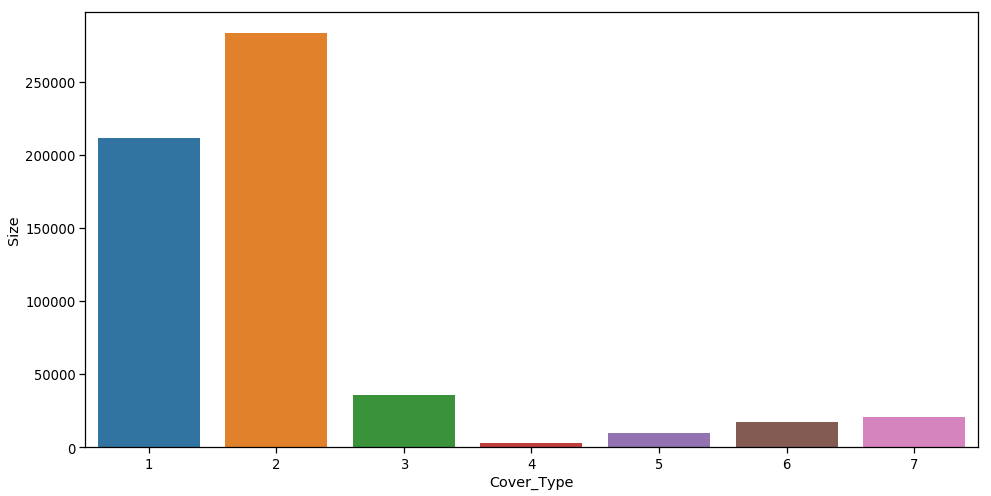

In [26]:
covertype_df = pd.DataFrame(df.groupby('Cover_Type').size(), columns=['Size'])

plt.figure(figsize=(16, 8))
sns.barplot(data=covertype_df, x=covertype_df.index, y='Size')
plt.show();

In [27]:
# grouping by forest cover type and calculate the total occurance
df.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

In [28]:
t = df.groupby('Cover_Type').size()
print('Cover_Type 1 and 2 in percent: {:.2f}%'.format((t.values[0] + t.values[1]) / (df.shape[0] / 100)))

Cover_Type 1 and 2 in percent: 85.22%


### Finding

* `Spruce` and `Lodgepole Pine` make up `85.22%` of the sampled trees.

## Continues data

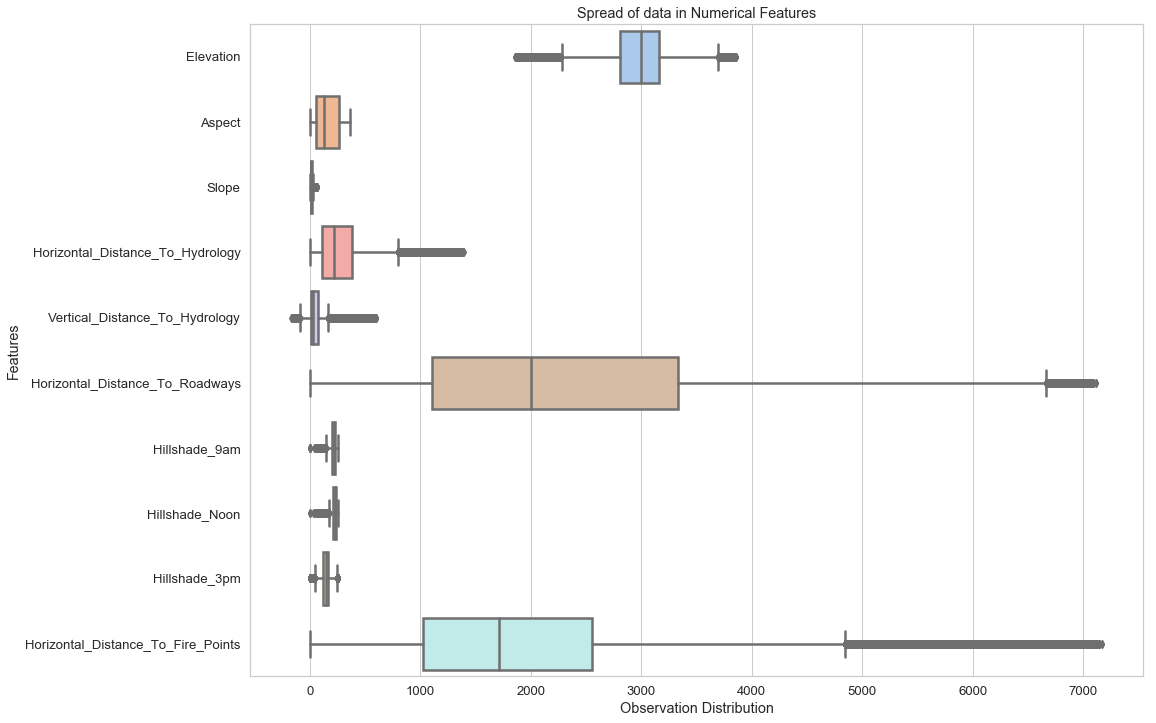

In [29]:
# Box and whiskers plot
# Spread of numerical features

sns.set_style("whitegrid")
plt.subplots(figsize=(16, 12))

# Using seaborn to plot it horizontally
sns.boxplot(data=cont_df, orient='h', palette='pastel')

plt.title('Spread of data in Numerical Features')
plt.xlabel('Observation Distribution')
plt.ylabel('Features')
plt.show();

In [30]:
print('Elevation min/max: {} - {} meters'.format(df['Elevation'].min(), df['Elevation'].max()))

Elevation min/max: 1859 - 3858 meters


### Finding

* As seen in the graph above `Slope` for example is highly dense. But we need to take into account that we are compairing several diverent data here. It would seem that the `Slope` would have a very narrow spread, but thats not true.
* Similarly, `Hillshade`'s features are dense in its range of values. 
* In comparison `Horizontal_Distance_To_Roadways` and `Horizontal_Distance_To_Fire_Points` have huge range of values.

All observations displayed above represent their range of values based on the type of measurements, i.e. degree, meter etc. Which may or may not be somewhat misleading. We should correct that and plot the features base on their measurement types (meter, degree and index).

## Continues Data 

**Feature Comparison**

Compare each feature in our data to our target variable, visualizing how much dense and distributed each target variable's class is compared to the feature. We will use Violin Plot to visualize this, a combination of Box Plot and Density Plot (Histogram).

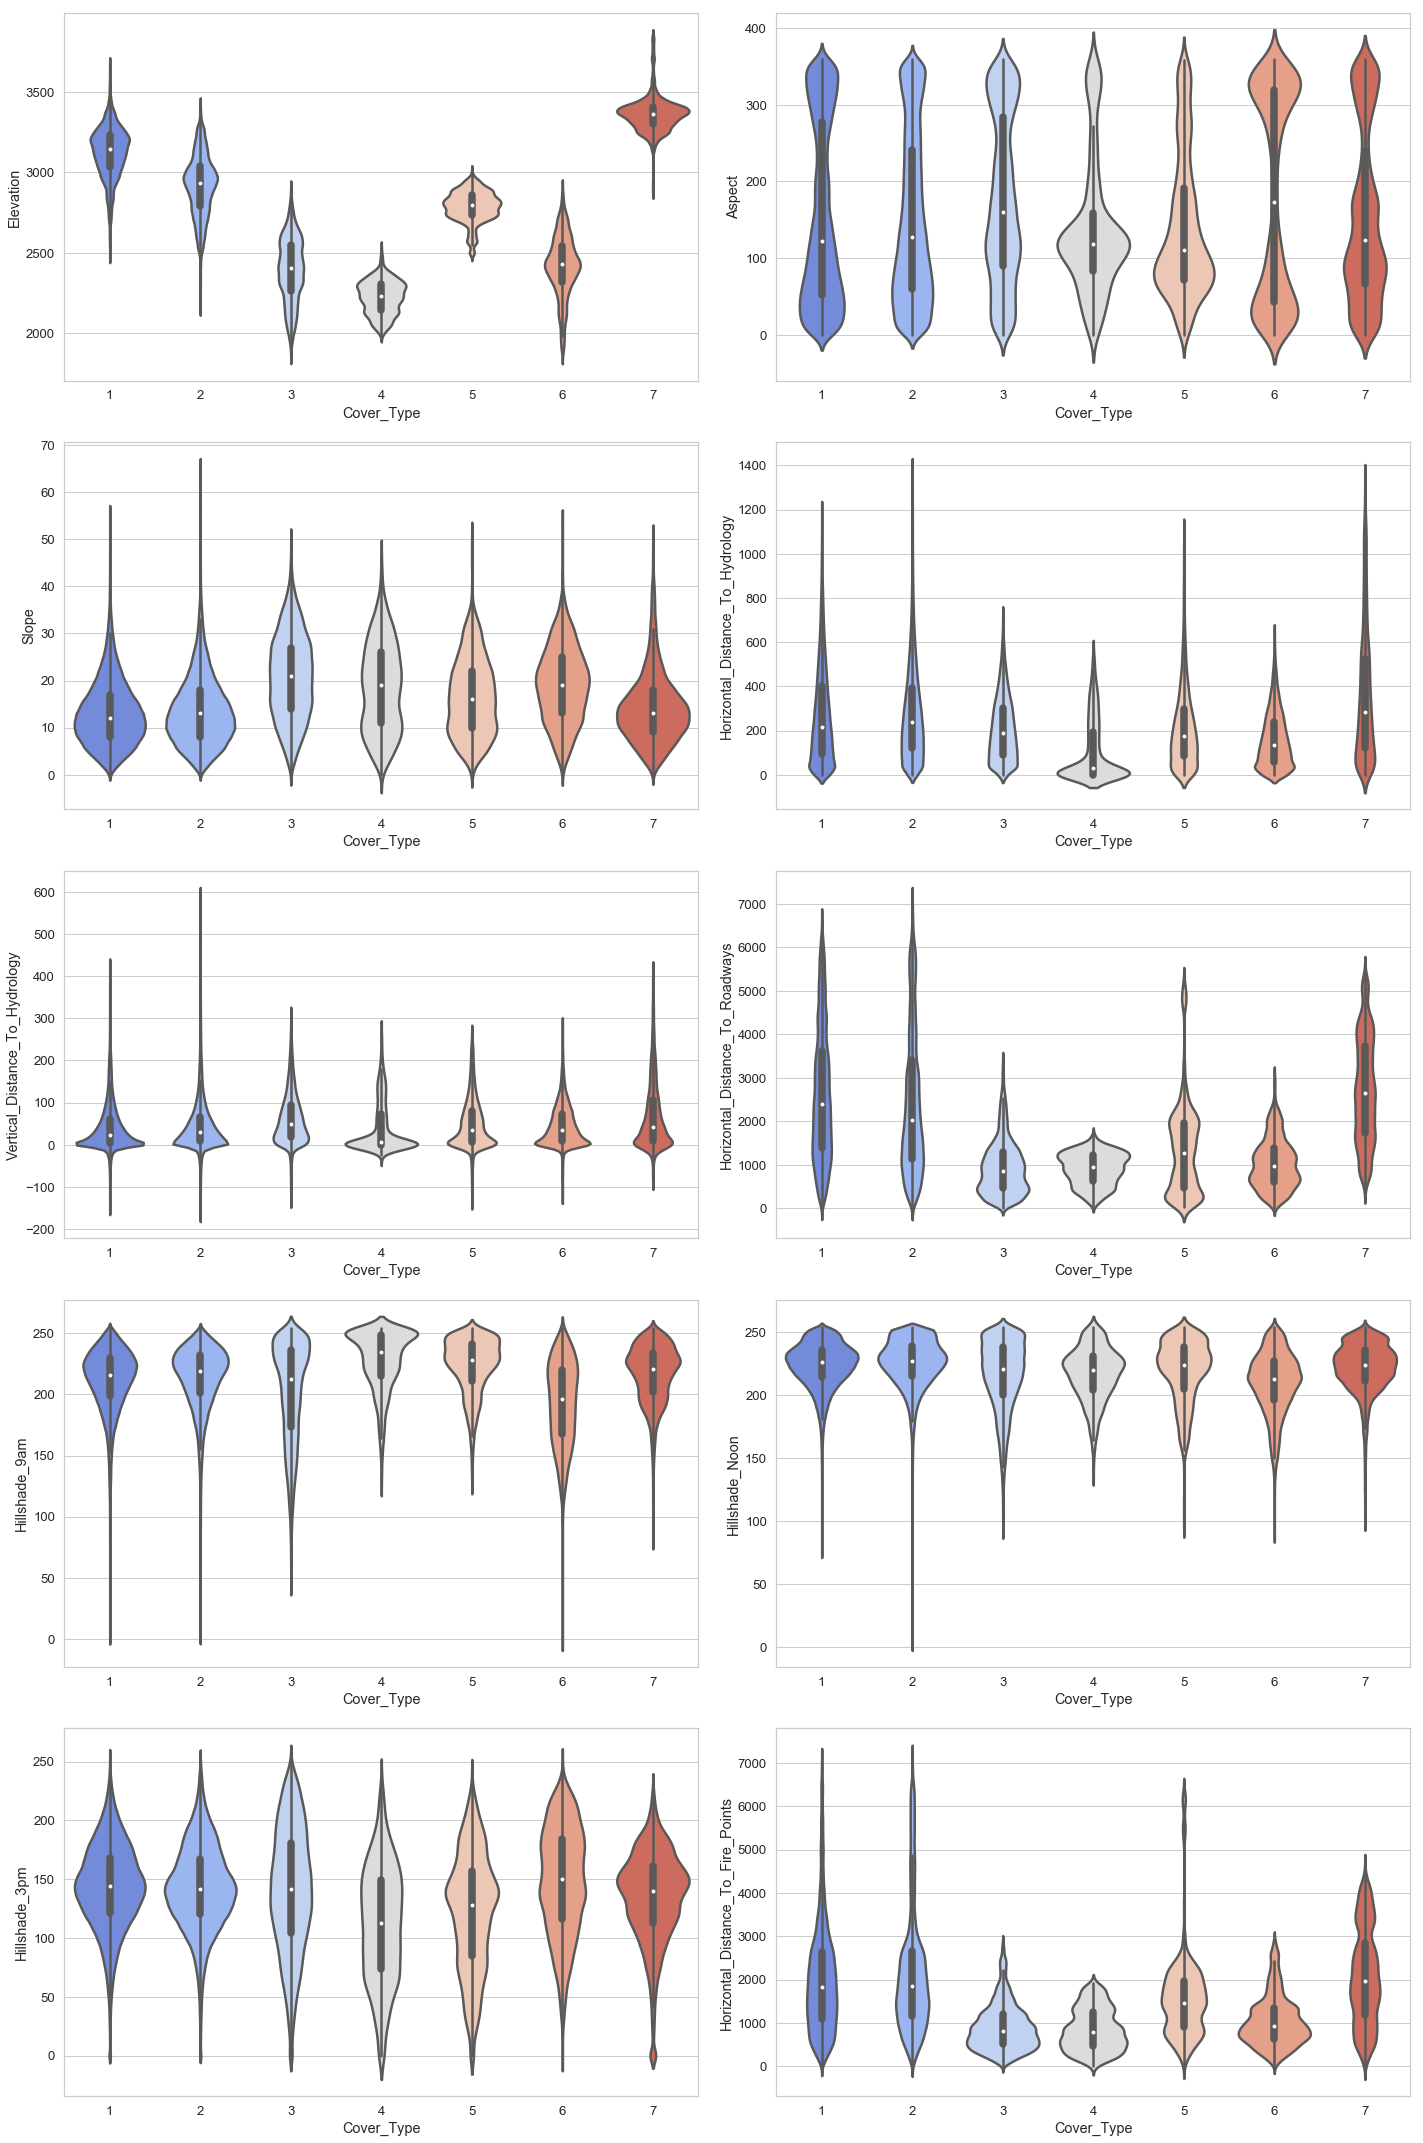

In [31]:
# pick number of columns
ncol = 2
# make sure enough subplots
nrow = math.floor((len(cont_df.columns) + ncol - 1) / ncol)
# create the axes
height = 6 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(cont_df.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.violinplot(data=df, x=df['Cover_Type'], y=col, ax=ax[ix], palette="coolwarm")

plt.tight_layout()
plt.show();

### Finding

* `Elevation` (meter) interestically differs very much by `Cover_Type`. For example, `Cover_tpye 7` is mainly seen in the higher elevations around 3400 meters.  Where as `Cover_Type 4`  can be found  between 2000 and about 2400 meters. 
* `Elevation` seems the most important feature due it's variation acroos all `Cover_Type`'s.
* `Aspect` (degrees azimuth[<sup>1</sup>](#fn1)) seems to have some concentration on either end of the spectrum. Most of them look like hourglasses.
* `Slope` (degree) has no clear distinction between `Cover_Type`, some have a wider range than others. 
* `Hillshade_9am` and `Hillshade_Noon` have a `negatively skewed distributions` with higher values between index 200-250 for most observations.
* `Hillshade_3pm` has a `normal distribution`. for all classes.


## Wilderness Areas

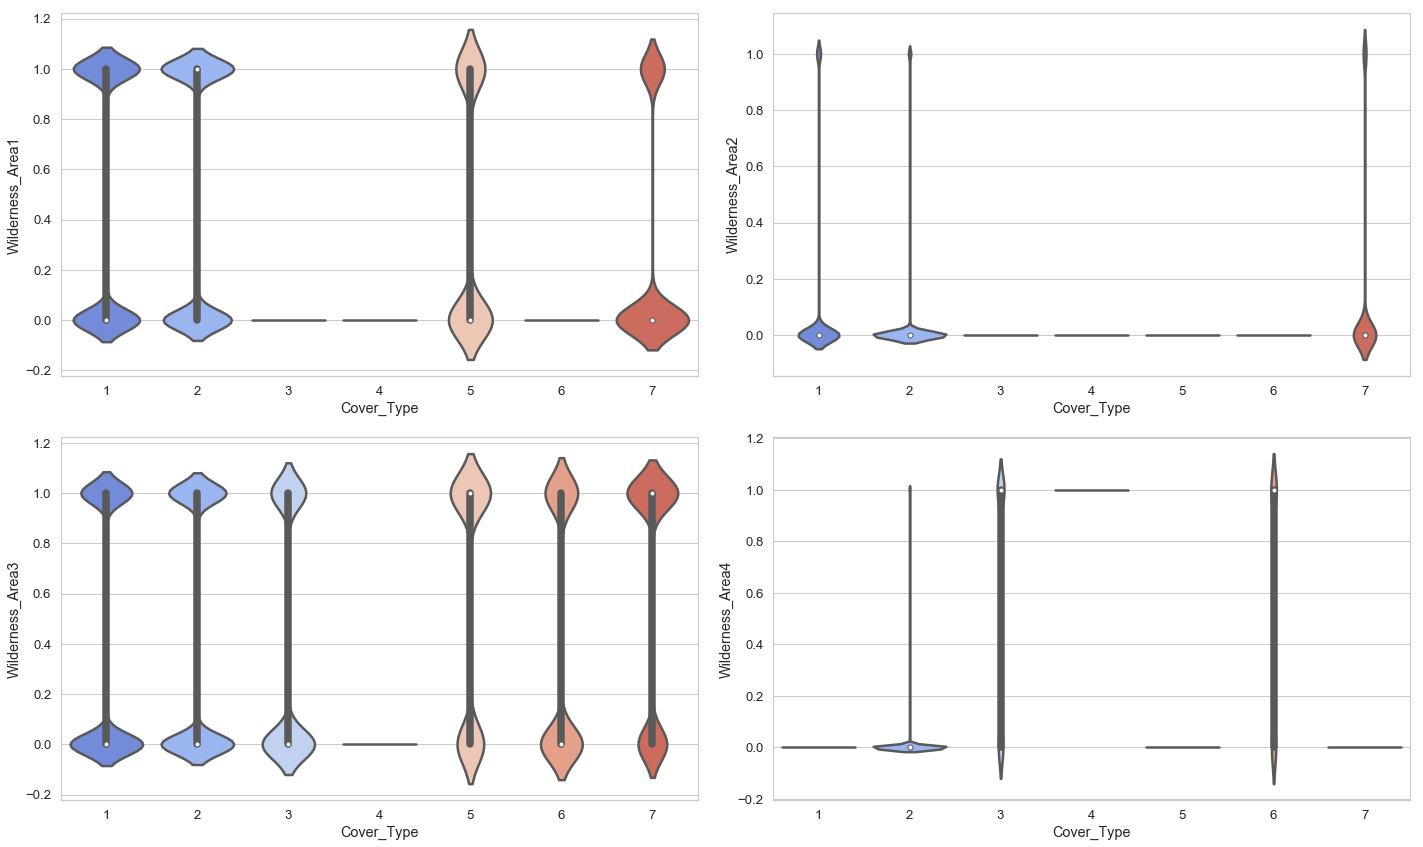

In [32]:
# pick number of columns
ncol = 2
# make sure enough subplots
nrow = math.floor((len(wild_df.columns) + ncol - 1) / ncol)
# create the axes
height = 6 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(wild_df.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.violinplot(data=df, x=df['Cover_Type'], y=col, ax=ax[ix], palette="coolwarm")

plt.tight_layout()
plt.show();

### Finding

We are looking at values `0` and `1`. But we can observe that `Wilderness_Area1` and `Wilderness_Area3` are more dominant across more `Cover_Type`'s.

## Soil_Type

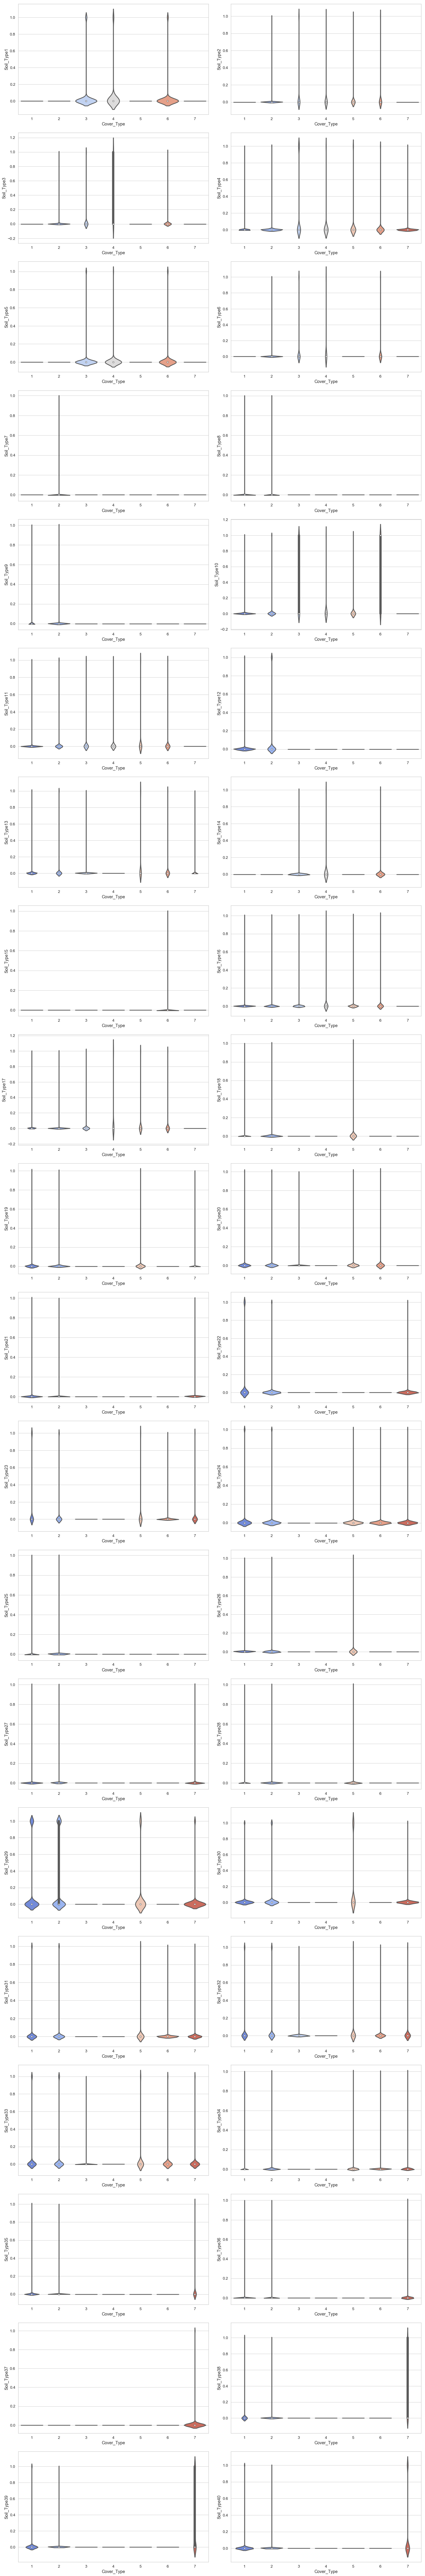

In [33]:
# pick number of columns
ncol = 2
# make sure enough subplots
nrow = math.floor((len(soil_df.columns) + ncol - 1) / ncol)
# create the axes
height = 6 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(soil_df.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.violinplot(data=df, x=df['Cover_Type'], y=col, ax=ax[ix], palette="coolwarm")

plt.tight_layout()
plt.show();

### Finding

* `Soil_Type4` is the only soil type that is present in all `Cover_Type`'s.
* `Cover_Type 4` seems to have the least presence compared to all other soil types.

## Convariance matrix

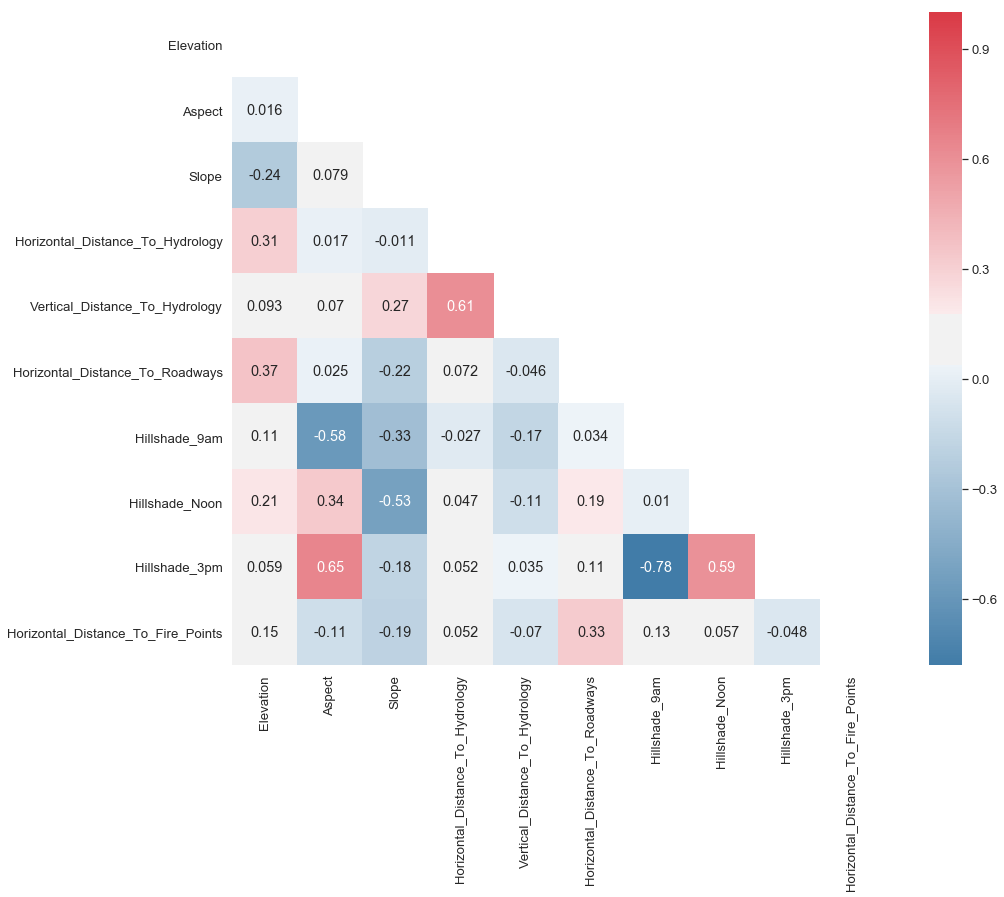

In [34]:
# Set the style of the visualization
sns.set_style('white')

# Create a convariance matrix
corr = cont_df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = None

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

# Draw the heatmapwith the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, square=True, annot=True)

plt.show();

### Finding 
* Correlation findings in rough order:
    * `Hillside_9am` - `Hillside_3pm`
    * `Hillside_3pm` - `Aspect`
    * `Hillside_9pm` - `Aspect`
    * `Hillside_3pm` - `Hillshade_Noon`
    * `Hillshade_Noon` - `Slope`
    * `Horizontal_Distance_To_Hydrology` - `Vertical_Distance_To_Hydrology`

### Plot Correlation

In [35]:
corr_list = [['Hillshade_3pm', 'Aspect', ], 
             ['Hillshade_9am', 'Aspect', ], 
             ['Hillshade_3pm', 'Hillshade_9am'], 
             ['Hillshade_3pm', 'Hillshade_Noon'],
             ['Hillshade_Noon', 'Slope'],  
             ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']]

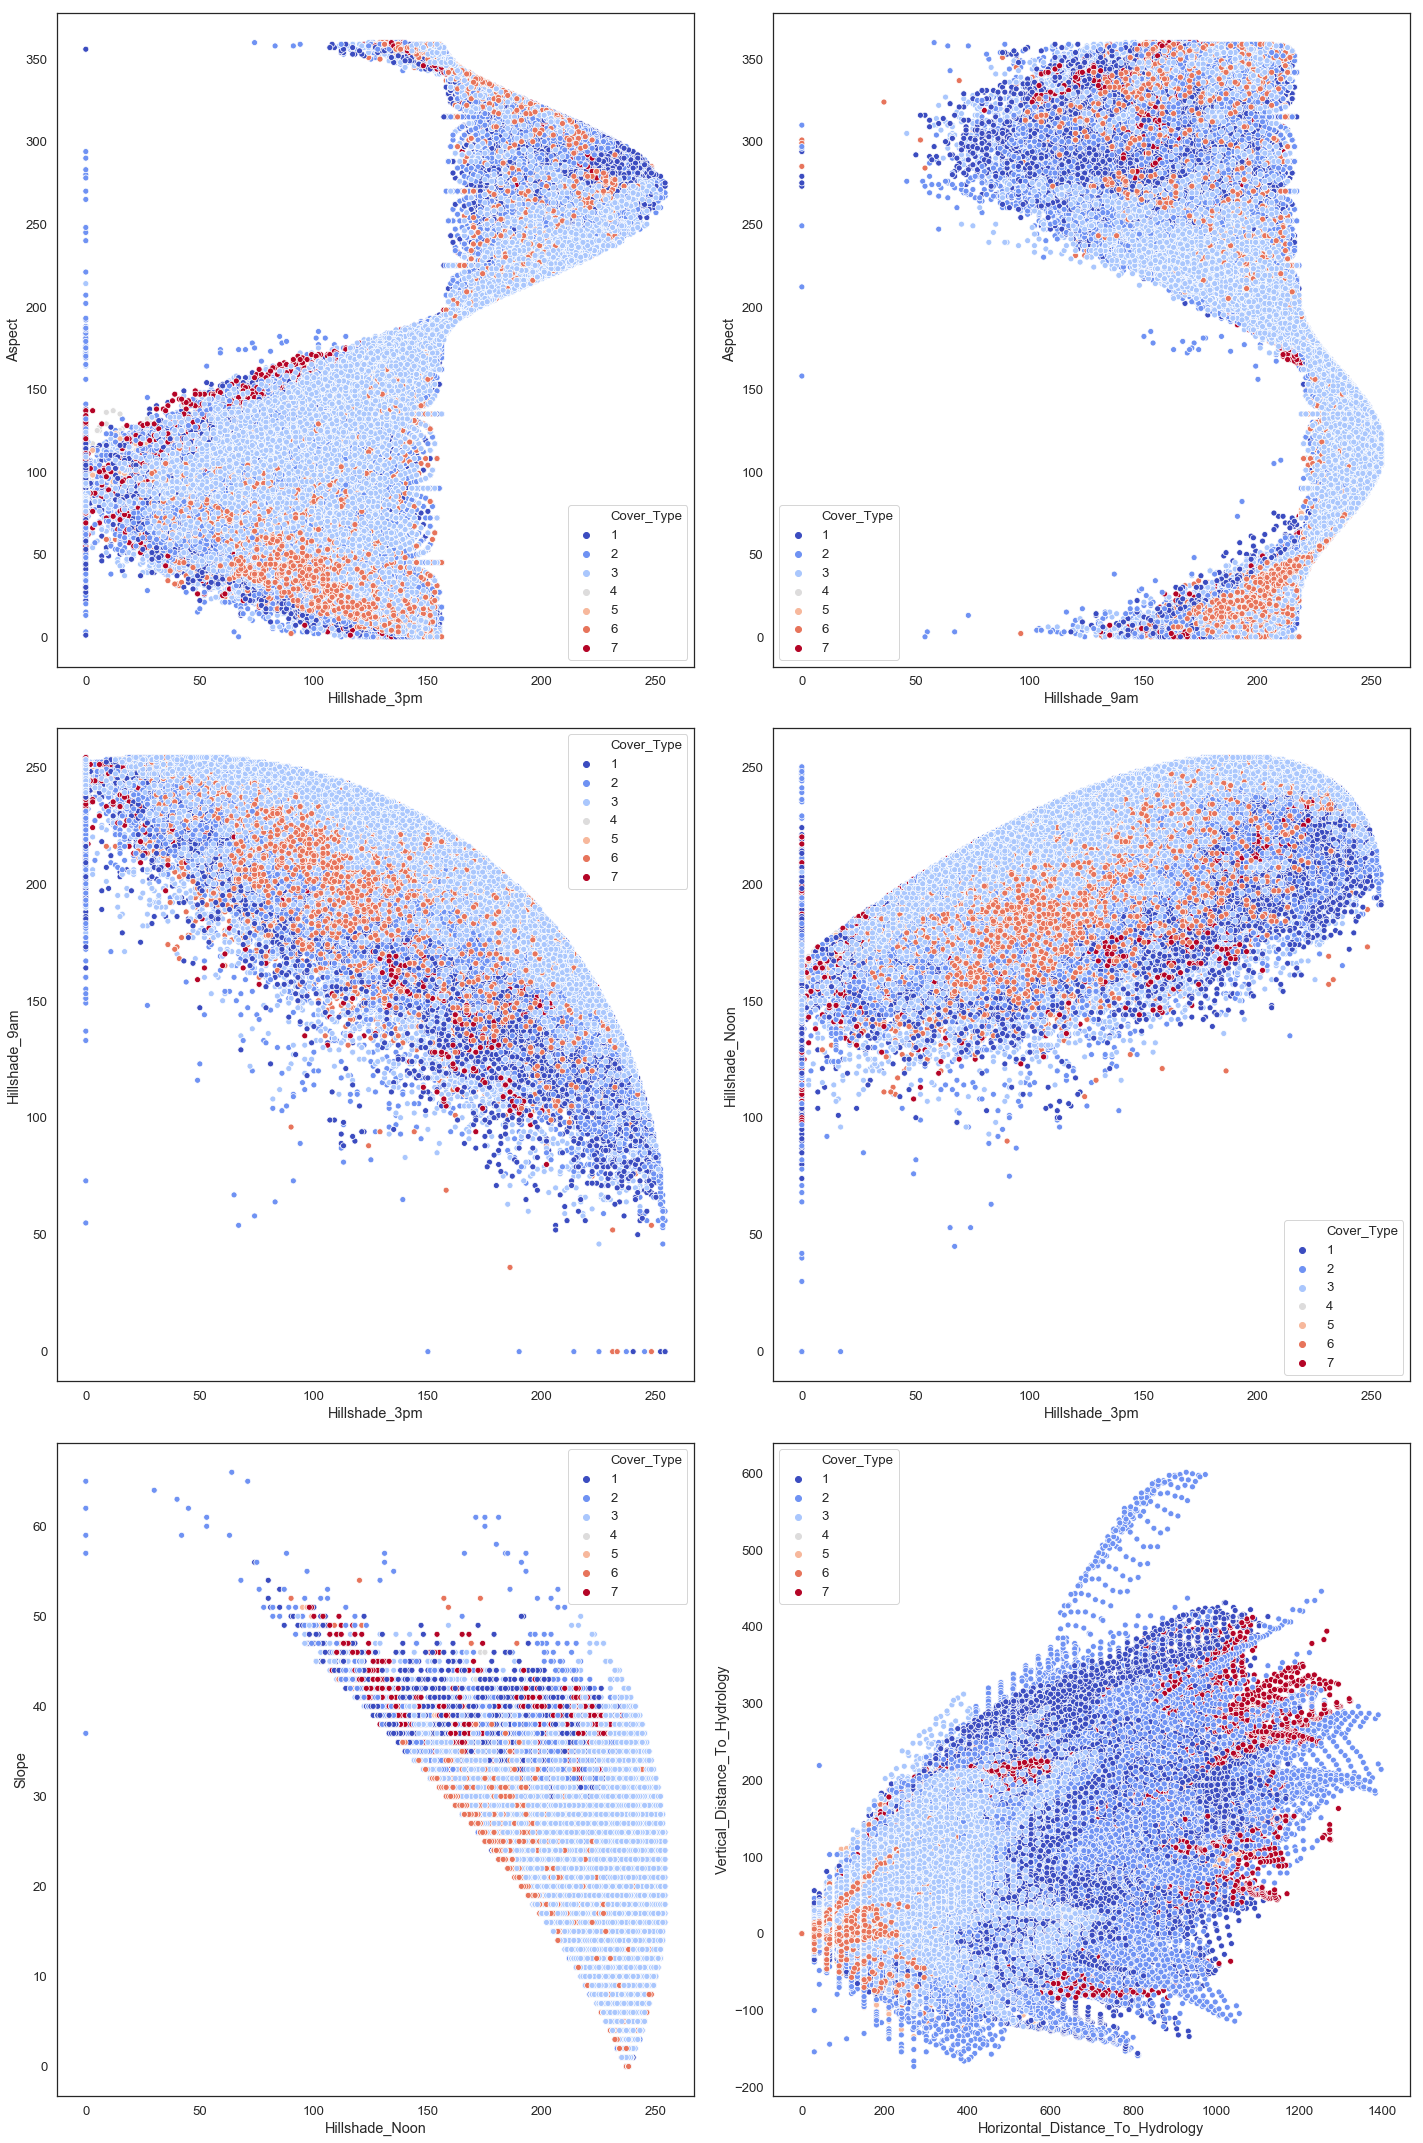

CPU times: user 3min 4s, sys: 3.11 s, total: 3min 7s
Wall time: 3min 6s


In [36]:
%%time
# pick number of columns
ncol = 2
# make sure enough subplots
nrow = math.floor((len(corr_list) + ncol - 1) / ncol)
# create the axes
height = 10 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

k=0
for i, j in corr_list:
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(k, ax.shape) 
    
    sns.scatterplot(data=df, x = i, y = j, hue="Cover_Type", ax=ax[ix], 
                    legend = 'full', palette='coolwarm')

    k += 1

plt.tight_layout()
plt.show();

### Finding

* From the looks, it feels like that `Cover_Type 3` dominates most of the correlations.
* `Hillshade_3pm` and `Hillshade_9am` look like sin curves 


---

# Data Engineering

* If not already done drop null values
* If not already done delete duplicate entries (keep first)
* Reduce features by keeping the most important once
* Scale (normilize) data
* Check if we have multiple entries across `Wilderness_Area` and `Soilt_Type` for each observation

## Checking Entries

In [37]:
wild_df.sum().sum() == df.shape[0]

True

In [38]:
soil_df.sum().sum() == df.shape[0]

True

Both, `Wilderness_Area` and `Soil_Type` don't have multiple entries or any missing once. I believe.

To make sure we should iterate over the features using `iterrows`. But this will do. 

We already did check for null values and duplicate values.

## Feature Selection by Hand

### Dimentionality Reduction

* From our data exploration we know that every feature has some sort of observations and therefore can't be deleted or should be at least.
* Because we want to find which feature has an impact on the prediction, we let the mode do the work. But which one?
* sklearn provides several classifer algorithims, like `Extra Tree`, `Random Forest`, `Gradient Boosting` and `AdaBoost` Classifiers which have an attribute called `feature_importance_`. This way we can see which feature is more important compare to others and by how much.[<sup>2</sup>](#fn2)
* We will create a dataset with all ranked `feature_importances_` to pick the top 20.

In [39]:
# Drop added features first
df.drop(['Wilderness_Types', 'Soil_Types'], axis=1, inplace=True)

In [40]:
# Create a target (y) and feature (X) set
y = df['Cover_Type']
X = df.drop('Cover_Type', axis=1)

In [41]:
# Create an empty dataframe to hold our findings for feature_importances_
ranking_df = pd.DataFrame()

### Random Forest Classifier

In [42]:
%%time
RFC_model = RandomForestClassifier(random_state=0, n_jobs=-1)
RFC_model.fit(X, y)

importances = RFC_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature name
rfc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['RFC'] = rfc_list

# Get feature importance
rfci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['RFC importance'] = rfci_list

CPU times: user 17.4 s, sys: 551 ms, total: 18 s
Wall time: 3.9 s


### Ada Boost Classifier

In [43]:
%%time
ABC_model = AdaBoostClassifier(random_state=0)
ABC_model.fit(X, y)

importances = ABC_model.feature_importances_
indices = np.argsort(importances)[::-1]

abc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['ABC'] = abc_list

abci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['ABC importance'] = abci_list

CPU times: user 40.4 s, sys: 958 ms, total: 41.4 s
Wall time: 41.6 s


### Gradient Boosting Classifier

In [44]:
%%time
GBC_model = GradientBoostingClassifier(random_state=0)
GBC_model.fit(X, y)

importances = GBC_model.feature_importances_
indices = np.argsort(importances)[::-1]

gbc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['GBC'] = gbc_list

gbci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['GBC importance'] = gbci_list

CPU times: user 10min 10s, sys: 25 s, total: 10min 35s
Wall time: 10min 35s


### Extra Trees Classifier

In [45]:
%%time
ETC_model = ExtraTreesClassifier(random_state=0, n_jobs=-1)
ETC_model.fit(X, y)

importances = ETC_model.feature_importances_
indices = np.argsort(importances)[::-1]

etc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['ETC'] = etc_list

etci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['ETC importance'] = etci_list

CPU times: user 9.98 s, sys: 617 ms, total: 10.6 s
Wall time: 2.35 s


In [46]:
ranking_df.head(25)

RFC  RFC importance  \
0                            Elevation        0.249225   
1      Horizontal_Distance_To_Roadways        0.116956   
2   Horizontal_Distance_To_Fire_Points        0.115346   
3     Horizontal_Distance_To_Hydrology        0.061742   
4       Vertical_Distance_To_Hydrology        0.058105   
5                               Aspect        0.046051   
6                       Hillshade_Noon        0.043800   
7                        Hillshade_3pm        0.039685   
8                        Hillshade_9am        0.039593   
9                                Slope        0.033359   
10                    Wilderness_Area4        0.022347   
11                    Wilderness_Area3        0.015651   
12                         Soil_Type22        0.014481   
13                          Soil_Type4        0.011336   
14                         Soil_Type39        0.010655   
15                         Soil_Type38        0.009920   
16                    Wilderness_Area1        0.009790   
17                         Soil_Type23        0.009561   
18                          Soil_Type2        0.008939   
19                         Soil_Type10        0.008449   
20                         Soil_Type12        0.007269   
21                         Soil_Type29        0.006388   
22                    Wilderness_Area2        0.006268   
23                         Soil_Type32        0.005750   
24                         Soil_Type40        0.005268   

                                   ABC  ABC importance  \
0                     Wilderness_Area4            0.44   
1                            Elevation            0.24   
2     Horizontal_Distance_To_Hydrology            0.14   
3                           Soil_Type4            0.06   
4                                Slope            0.04   
5       Vertical_Distance_To_Hydrology            0.04   
6                               Aspect            0.02   
7                          Soil_Type10            0.02   
8                           Soil_Type2            0.00   
9                          Soil_Type11            0.00   
10                          Soil_Type9            0.00   
11                          Soil_Type8            0.00   
12                          Soil_Type7            0.00   
13                          Soil_Type6            0.00   
14                          Soil_Type5            0.00   
15                          Soil_Type3            0.00   
16                    Wilderness_Area3            0.00   
17                          Soil_Type1            0.00   
18                         Soil_Type39            0.00   
19                    Wilderness_Area2            0.00   
20                    Wilderness_Area1            0.00   
21  Horizontal_Distance_To_Fire_Points            0.00   
22                       Hillshade_3pm            0.00   
23                      Hillshade_Noon            0.00   
24                       Hillshade_9am            0.00   

                                   GBC  GBC importance  \
0                            Elevation        0.658738   
1      Horizontal_Distance_To_Roadways        0.053042   
2     Horizontal_Distance_To_Hydrology        0.039433   
3   Horizontal_Distance_To_Fire_Points        0.037229   
4                     Wilderness_Area1        0.024046   
5                       Hillshade_Noon        0.021209   
6                           Soil_Type4        0.017850   
7                           Soil_Type2        0.013413   
8                          Soil_Type22        0.013262   
9                     Wilderness_Area3        0.013123   
10                         Soil_Type32        0.011929   
11                         Soil_Type23        0.010703   
12      Vertical_Distance_To_Hydrology        0.008929   
13                       Hillshade_9am        0.006835   
14                         Soil_Type39        0.006824   
15                              Aspect        0.006620   
16                         Soil

### Finding

Here we can see from each classifier the top 20 features.

* `Random Forest` and `Extra Tree` Classifier show the most similar results.
* `Gradian Boosting` shows similar names just in a different order compared to `Random Forest` and `Extra Tree`
* `AdaBoost` on the other hand shows an interesting and unique result. The top 8 feature alone are enough to make a good class prediction. Compare to all the other classifiers, here we have `Wilderness_Area4` on top, before `Elevation`.
* `Elevation` dominates in all classifiers with a range of `18-65%`.
* `Hillshade` features are seen in the top 20 in 3 out of 4 classifiers. `Random Forest` and `Extra Tree` Classifier show that `Hillshade` features having similar ranging.
* `Horizontal_Distance_To_Hydrology` and `Vertical_Distance_To_Hydrology` are in all classifier top 10.
* `Horizontal_Distance_To_Roadways` and `Horizontal_Distance_To_Fire_Points` are represented on the top in 3 out of 4 classifiers.
* `Aspect` and `Slope` also show up in the top 20 across all classifiers, with the exception in `Gradian Boosting` `Slope` isn't in the top 20.
* In regards to `Soil_Type` it is hard to find some commonality. Here are just a few:
    * `Soil_Type2`
    * `Soil_Type4`
    * `Soil_Type10`
    * `Soil_Type22`
    * `Soil_Type23`
    * `Soil_Type39`
    

**Technical Note:**

We want to avoid `GradientBoostingClassifier` due to time it takes to run -> `10min 35s`

Lets compare the top 25 features from `Random Forest` and `Extra Tree` Classifiers because they are the most similar classifiers.

In [47]:
ranking_df[['RFC','ETC']].head(25)

RFC                                 ETC
0                            Elevation                           Elevation
1      Horizontal_Distance_To_Roadways     Horizontal_Distance_To_Roadways
2   Horizontal_Distance_To_Fire_Points  Horizontal_Distance_To_Fire_Points
3     Horizontal_Distance_To_Hydrology    Horizontal_Distance_To_Hydrology
4       Vertical_Distance_To_Hydrology      Vertical_Distance_To_Hydrology
5                               Aspect                              Aspect
6                       Hillshade_Noon                      Hillshade_Noon
7                        Hillshade_3pm                       Hillshade_9am
8                        Hillshade_9am                       Hillshade_3pm
9                                Slope                    Wilderness_Area4
10                    Wilderness_Area4                               Slope
11                    Wilderness_Area3                         Soil_Type12
12                         Soil_Type22                         Soil_Type22
13                          Soil_Type4                    Wilderness_Area3
14                         Soil_Type39                         Soil_Type39
15                         Soil_Type38                         Soil_Type38
16                    Wilderness_Area1                         Soil_Type10
17                         Soil_Type23                         Soil_Type23
18                          Soil_Type2                          Soil_Type4
19                         Soil_Type10                          Soil_Type2
20                         Soil_Type12                    Wilderness_Area1
21                         Soil_Type29                         Soil_Type29
22                    Wilderness_Area2                         Soil_Type40
23                         Soil_Type32                         Soil_Type13
24                         Soil_Type40                         Soil_Type30

From the listed features above we will select 20. This is more or less just based on intuition. But it seems appropriate to make a selection that rather than just go with one classifier, for exmaple `AdaBoost`.

### Feature Selection

Here is a list of features I would choose.

In [48]:
sample_df = df[['Elevation', 
                'Aspect', 
                'Slope', 
                'Horizontal_Distance_To_Hydrology',
                'Vertical_Distance_To_Hydrology', 
                'Horizontal_Distance_To_Roadways',
                'Horizontal_Distance_To_Fire_Points', 
                'Hillshade_9am', 
                'Hillshade_Noon',
                'Hillshade_3pm', 
                'Wilderness_Area1', 
                'Wilderness_Area3', 
                'Wilderness_Area4', 
                'Soil_Type2',
                'Soil_Type4', 
                'Soil_Type10', 
                'Soil_Type22', 
                'Soil_Type23', 
                'Soil_Type29',
                'Soil_Type39', 
                'Cover_Type']]

### Feature Scaling

In [49]:
y = df['Cover_Type']
X = sample_df.drop('Cover_Type', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
print(X_train.shape, X_test.shape)

(435759, 20) (145253, 20)


### K-Neighbors Classifier

In [51]:
%%time
clf = KNeighborsClassifier(weights='distance', n_jobs=-1)
clf.fit(X_train, y_train)

CPU times: user 1min 38s, sys: 341 ms, total: 1min 38s
Wall time: 1min 38s


### Cross Validation

In [52]:
%%time
accuracy = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs=-1)
f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro', n_jobs=-1)

acc_mean = np.round(accuracy.mean() * 100, 2)
f1_mean = np.round(f1_score.mean() * 100, 2)
    
print('accuracy: {}%'.format(acc_mean))
print('f1_score: {}%'.format(f1_mean))

accuracy: 92.23%
f1_score: 86.74%
CPU times: user 783 ms, sys: 483 ms, total: 1.27 s
Wall time: 22min 24s


### Finding

Let make a note of the accuracy and f1 score values and compare them with the workflow below. Remember, all we have done so far is trying to figure out "by hand" what features would be best to use for our prediction.

* `accuracy: 92.23%`
* `f1_score: 86.74%`

For doing the ground work by hand so to speak nit bad. Actually pretty good. But it is a lot of work and can be very time consuming. 

---

## Feature Selection (the sklearn way)

### Feature Scaling

> Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.



In [53]:
y = df['Cover_Type']
X = df.drop('Cover_Type', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
pd.DataFrame(data=X_scaled, columns=X.columns).head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -1.297805 -0.935157 -1.482820                         -0.053767   
1  -1.319235 -0.890480 -1.616363                         -0.270188   
2  -0.554907 -0.148836 -0.681563                         -0.006719   
3  -0.622768 -0.005869  0.520322                         -0.129044   
4  -1.301377 -0.988770 -1.616363                         -0.547771   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.796273                        -1.180146   
1                       -0.899197                        -1.257106   
2                        0.318742                         0.532212   
3                        1.227908                         0.474492   
4                       -0.813427                        -1.256464   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.330743        0.439143       0.142960   
1       0.293388        0.590899       0.221342   
2       0.816364        0.742654      -0.196691   
3       0.965786        0.742654      -0.536343   
4       0.293388        0.540313       0.195215   

   Horizontal_Distance_To_Fire_Points     ...       Soil_Type31  Soil_Type32  \
0                            3.246283     ...          -0.21498    -0.315238   
1                            3.205504     ...          -0.21498    -0.315238   
2                            3.126965     ...          -0.21498    -0.315238   
3                            3.194931     ...          -0.21498    -0.315238   
4                            3.165479     ...          -0.21498    -0.315238   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0    -0.290284     -0.05273    -0.057143    -0.014313    -0.022653   
1    -0.290284     -0.05273    -0.057143    -0.014313    -0.022653   
2    -0.290284     -0.05273    -0.057143    -0.014313    -0.022653   
3    -0.290284     -0.05273    -0.057143    -0.014313    -0.022653   
4    -0.290284     -0.05273    -0.057143    -0.014313    -0.022653   

   Soil_Type38  Soil_Type39  Soil_Type40  
0    -0.165956    -0.156014    -0.123654  
1    -0.165956    -0.156014    -0.123654  
2    -0.165956    -0.156014    -0.123654  
3    -0.165956    -0.156014    -0.123654  
4    -0.165956    -0.156014    -0.123654  

[5 rows x 54 columns]

### Dimentionality Reduction with PCA

**Principal component analysis (PCA)**

> Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

Using Classifiers with its attribute `feature_importances_` is very time consuming and not particularly accurate at the end, due to the subjective matter how one chooses features. PCA does all the work for us and is much faster in doing it.

In [55]:
%%time
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

CPU times: user 13.8 s, sys: 1.75 s, total: 15.5 s
Wall time: 5.21 s


In [56]:
pc = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
      'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']

X_pca = pd.DataFrame(data=X_pca, columns=pc)
X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.437896  1.280411 -0.851828 -0.282254 -0.801912 -0.574509  0.739538   
1 -2.450339  1.232372 -1.022017 -0.491607 -0.793977 -0.531028  0.727673   
2 -2.724466  0.749710 -0.625233  0.116244 -1.084741 -1.838581  3.533572   
3 -2.102706  1.170087  0.020033  1.311611 -0.849368 -0.161643  1.064080   
4 -2.445158  1.328231 -0.997113 -0.554048 -0.779072 -0.440021  0.705908   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.862518  1.270891 -0.554300 -0.052043 -0.098637 -0.097319  0.288928   
1 -0.845473  1.285462 -0.566755 -0.051793 -0.098274 -0.104803  0.300654   
2 -0.136567 -1.053715  0.614279 -0.080305  0.180984 -0.053380 -0.333478   
3  2.948535 -1.646352 -0.143778  0.690429 -0.562312  0.041732  1.504340   
4 -0.848124  1.280164 -0.563225 -0.053594 -0.101199 -0.098558  0.292411   

       PC15      PC16      PC17      PC18      PC19      PC20  
0  0.123151 -0.044053  0.118998  0.189725  0.108422  0.100739  
1  0.120248 -0.046349  0.124416  0.187528  0.115868  0.109351  
2  0.886350  0.734977  0.279451 -0.465526  0.064393 -0.409398  
3 -0.506076 -0.566302  0.295730  0.449016  0.434922 -0.486985  
4  0.111038 -0.046108  0.124448  0.174552  0.123582  0.120892

**Note**: By using PCA we are loosing any meaningful feature names. All what we have done is tell PCA that we want to keep $n$ number of components (`n_components=20`).

### Train-Test Split

We will go with the default test_size of 0.25 and set the random_state to 0 to be constant.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)

print(X_train.shape, X_test.shape)

(435759, 20) (145253, 20)


### K-Neighbors Classifier

In [59]:
%%time
clf = KNeighborsClassifier(weights='distance', n_jobs=-1)
clf.fit(X_train, y_train)

CPU times: user 1.33 s, sys: 52.5 ms, total: 1.38 s
Wall time: 1.38 s


### Cross Validation

In [60]:
%%time
accuracy = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs=-1)
f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro', n_jobs=-1)

CPU times: user 733 ms, sys: 369 ms, total: 1.1 s
Wall time: 40.4 s


In [61]:
acc_mean = np.round(accuracy.mean() * 100, 2)
f1_mean = np.round(f1_score.mean() * 100, 2)
    
print('accuracy: {}%'.format(acc_mean))
print('f1_score: {}%'.format(f1_mean))

accuracy: 90.64%
f1_score: 84.38%


In [67]:
predict = clf.predict(X_test)

In [69]:
# calculating accuracy
accuracy = accuracy_score(y_test, predict)

print('KNeighbors Classifier model')
print('Accuracy: {:.2f}%'.format(accuracy * 100))

KNeighbors Classifier model
Accuracy: 91.02%


In [68]:
knn_classification_report = classification_report(y_test, predict)
print(knn_classification_report)

              precision    recall  f1-score   support

           1       0.92      0.91      0.91     52943
           2       0.92      0.93      0.93     70897
           3       0.88      0.88      0.88      8890
           4       0.81      0.74      0.78       704
           5       0.79      0.74      0.76      2340
           6       0.77      0.77      0.77      4384
           7       0.93      0.93      0.93      5095

   micro avg       0.91      0.91      0.91    145253
   macro avg       0.86      0.84      0.85    145253
weighted avg       0.91      0.91      0.91    145253



### Finding

Now lets remember the values we got when we did all the work to find the right features by hand:

* `accuracy: 92.23%`
* `f1_score: 86.74%`

Using PCA to reduce dimentionality instead gives use the following values:

* `accuracy: 90.72%`
* `f1_score: 84.44%`

Now, is that a big enough difference to justify all the labour (time mainly) to get such a small gain of ~2%? Properbly not.

---

# Model Evaluation

We will use the train_test_split data from previous steps (6.3.). And we shall use the follow classifiers from `sklearn.ensemble`:

```
1. Random Forest Classifier (RFC)
2. Stochastic Gradient Descent Classifier (SGDC)
3. Extraa Trees Classifier (ETC)
```

## Random Forest Classifier

In [70]:
%%time
rf_clf = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)
rf_clf.fit(X_train, y_train)

CPU times: user 4min 34s, sys: 1.92 s, total: 4min 36s
Wall time: 46.4 s


### Cross-Validation

In [71]:
%%time
accuracy = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
f1_score = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='f1_macro', n_jobs=-1)

CPU times: user 785 ms, sys: 479 ms, total: 1.26 s
Wall time: 13min 9s


In [72]:
print('accuracy: {:.2f}%'.format(accuracy.mean() * 100))
print('f1_score: {:.2f}%'.format(f1_score.mean() * 100))

accuracy: 93.53%
f1_score: 88.75%


## Extra Tree Classifier

In [73]:
%%time
tree_clf = ExtraTreesClassifier(n_estimators=50, random_state=0, n_jobs=-1)
tree_clf.fit(X_train, y_train)

CPU times: user 54.2 s, sys: 1.6 s, total: 55.8 s
Wall time: 8.99 s


### Cross Validation

In [74]:
%%time
accuracy = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
f1_score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='f1_macro', n_jobs=-1)

CPU times: user 716 ms, sys: 376 ms, total: 1.09 s
Wall time: 3min 24s


In [75]:
print('accuracy: {:.2f}%'.format(accuracy.mean() * 100))
print('f1_score: {:.2f}%'.format(f1_score.mean() * 100))

accuracy: 94.21%
f1_score: 89.91%


## Gradient Boosting Classifier

In [106]:
%%time
grad_clf = GradientBoostingClassifier(n_estimators=50, random_state=0)
grad_clf.fit(X_train, y_train)

CPU times: user 4min, sys: 10.7 s, total: 4min 11s
Wall time: 4min 12s


### Cross Validation

In [107]:
%%time
accuracy = cross_val_score(grad_clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
f1_score = cross_val_score(grad_clf, X_train, y_train, cv=10, scoring='f1_macro', n_jobs=-1)

CPU times: user 812 ms, sys: 593 ms, total: 1.4 s
Wall time: 35min 49s


In [108]:
print('accuracy: {:.2f}%'.format(accuracy.mean() * 100))
print('f1_score: {:.2f}%'.format(f1_score.mean() * 100))

accuracy: 74.94%
f1_score: 60.14%


## Finding

* So `GradientBoostingClassifier` has the longest run time of all classifiers, building the model took `4min` and the cross validation, og my god, took (Wall time) `35min 49s`. Not only it took the longest, but the accuracy and f1 score weren't that great, with `74.94%` and `60.19%` respectively.
* Again, the `CPU time` is the first observation which stands out. Mainly the time spend on `cross_val_score`. 
* `KNeighborsClassifier` takes mere `40s` where as in contrast `RandomForestClassifier` takes `13min` to calculate (Wall time).
* The overall best result comes from `ExtraTreesClassifier`, the build of the model and the cross validation took `3min 24s`. With an accuracy of `94.21%` and a f1 score of `89.91%`.
* There is one question though I would like to have anwsered, and that is 
> Shall we use `cross_val_score` or `cross_validate`, or better when to use one over the other?



# Testing Model

We will test our model using the `Random Forest Classifier` model.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [88]:
est = [10, 25, 50, 100, 150, 200, 250]

for e in est:
    clf = RandomForestClassifier(n_estimators=e, random_state=0, n_jobs=-1)
    clf = clf.fit(X_train, y_train)
    
    predict = clf.predict(X_test)
    
    print('n_estimators={}'.format(e))
    
    accuracy = accuracy_score(y_test, predict)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    p, r, f, s = precision_recall_fscore_support(y_test, predict, average='weighted')
    print('fscore: {:.2f}%'.format(f*100))
    
    print()

n_estimators=10
Accuracy: 92.70%
fscore: 92.65%

n_estimators=25
Accuracy: 93.57%
fscore: 93.54%

n_estimators=50
Accuracy: 93.86%
fscore: 93.82%

n_estimators=100
Accuracy: 93.97%
fscore: 93.94%

n_estimators=150
Accuracy: 94.02%
fscore: 93.99%

n_estimators=200
Accuracy: 94.03%
fscore: 94.00%

n_estimators=250
Accuracy: 94.06%
fscore: 94.02%



In [89]:
clf = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)
clf = clf.fit(X_train, y_train)

In [90]:
# predicting unseen data
predict = clf.predict(X_test)

In [91]:
# calculating accuracy
accuracy = accuracy_score(y_test, predict)

print('Random Forest Classifier model')
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Random Forest Classifier model
Accuracy: 93.86%


In [92]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94     52943
           2       0.94      0.96      0.95     70897
           3       0.91      0.94      0.92      8890
           4       0.90      0.76      0.82       704
           5       0.92      0.74      0.82      2340
           6       0.88      0.82      0.85      4384
           7       0.96      0.93      0.95      5095

   micro avg       0.94      0.94      0.94    145253
   macro avg       0.92      0.87      0.89    145253
weighted avg       0.94      0.94      0.94    145253



## Finding

Iterating over a list of estimator numbers [10, 25, 50, 100, 150, 200, 250] to find the optimal value for the `RandomForestClassifier`. Currently the default value is `10` and will change to `100` in the upcoming version 0.22.

n_estimator | accuracy | f_score
------------|----------|--------
10          | 92.70%   | 92.65%
25          | 93.57%   | 93.54%
50          | 93.86%   | 93.82%
100         | 93.97%   | 93.94%
150         | 94.02%   | 93.99%
200         | 94.03%   | 94.00%
250         | 94.06%   | 94.02%

I saddled on `n_estimators = 50` because it seems a good compromise between `10` and `100`. Higher number give us a better, a more accurate performance. On the other hand a higher has the drawback of increased processing power and can take a lot of time.



# Pipeline using seperate Train-Test datasets

Let's apply our insides to two datasets, one is the train dataset which has a size of 15.1k x 56 and and the test dataset with a size of 566k x 55.

## Read Data

In [52]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
0            221             232            148     ...                0   
1            220             235            151     ...                0   
2            234             238            135     ...                0   
3            238             238            122     ...                0   
4            220             234            150     ...                0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [53]:
train_df.drop('Id', axis=1, inplace=True)
train_df.shape

(15120, 55)

In [54]:
test_df = pd.read_csv('data/covtype.csv')
test_df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points     ...      Soil_Type32  Soil_Type33  \
0                                6279     ...                0            0   
1                                6225     ...                0            0   
2                                6121     ...                0            0   
3                                6211     ...                0            0   
4                                6172     ...                0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [55]:
test_df.shape

(581012, 55)

## Grid Search using Pipeline

<img src="pipeline.svg" width="60%">

In [ ]:
y = train_df['Cover_Type']
X = train_df.drop('Cover_Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create the pipeline
pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(iterated_power=7)),
                 ('clf', ExtraTreesClassifier(random_state=0, n_jobs=-1))])

param_range = [1, 2, 3, 4, 5]

# Create the grid parameter
grid_params = [{'pca__n_components': [10, 15, 20, 25, 30],
                'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__max_depth': param_range,
                'clf__min_samples_split': param_range[1:]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

**The following result is from the sandbox notebook**

In [ ]:
# Best accuracy
print('Best accuracy: %.3f' % gridsearch.best_score_)

# Best params
print('\nBest params:\n', gridsearch.best_params_)

**The following result is from the sandbox notebook**

## Pipeline using GridSearchCV Results

In [48]:
pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(n_components=25)),
                 ('tree', ExtraTreesClassifier(criterion='entropy',
                                               max_depth=5, 
                                               min_samples_leaf=1, 
                                               min_samples_split=4,
                                               random_state=42, 
                                               n_jobs=-1))])

In [56]:
y = test_df['Cover_Type']
X = test_df.drop('Cover_Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('tree', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           ...stimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [58]:
score = pipe.score(X_test, y_test)
print('Test Accuarcy: {:.2f}%'.format(score * 100))

Test Accuarcy: 60.12%


In [59]:
cross_val_score(pipe, X_train, y_train)

array([0.59467423, 0.59911327, 0.58753184])

In [60]:
y_pred = pipe.predict(X_test)
print("Testing Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy: 60.12%


### Finding

Using GridSearchCV didn't help the result. But that is most likely due to inexperience. 

## Pipeline

In [63]:
pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(n_components=20)),
                 ('tree', ExtraTreesClassifier(random_state=42, n_jobs=-1))])

In [64]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('tree', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max...stimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [65]:
score = pipe.score(X_test, y_test)
print('Test Accuarcy: {:.2f}%'.format(score * 100))

Test Accuarcy: 86.75%


In [66]:
cross_val_score(pipe, X_train, y_train)

array([0.87170926, 0.87779254, 0.8502926 ])

In [67]:
y_pred = pipe.predict(X_test)
print("Testing Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy: 86.75%


# Conclusion

With all the work done now, can we we actally predict which `Cover Type` we will see, given for example `Elevation`, `Slope`, `Hillshade`, `Soil_Type` and a few more? 

**Yes**! With the given data collected by the researchers we can predict which type of tree could we find in a given area.

**Technical Note:**

`Extra Tree Classifier` is the best choice to make predictions for the `Forest Cover Type Dataset`. Two points stand out here:

* calculation time
* accuracy and f1_score


# Footnotes

<span id="fn1"> (1)  
> An azimuth is an angular measurement in a spherical coordinate system. The vector from an observer to a point of interest is projected perpendicularly onto a reference plane; the angle between the projected vector and a reference vector on the reference plane is called the azimuth.

![](Azimuth-Altitude_schematic.svg)

<span id="fn2"> (2) From [stackoverflow](https://stackoverflow.com/a/20187191) </span>
> `ExtraTreeClassifier` is an extremely randomized version of `DecisionTreeClassifier` meant to be used internally as part of the `ExtraTreesClassifier` ensemble.
>
> Averaging ensembles such as a `RandomForestClassifier` and `ExtraTreesClassifier` are meant to tackle the variance problems (lack of robustness with respect to small changes in the training set) of individual `DecisionTreeClassifier` instances.
>
> If your main goal is maximizing prediction accuracy you should almost always use an ensemble of decision trees such as `ExtraTreesClassifier` (or alternatively a boosting ensemble) instead of training individual decision trees.